# ----------------`US ELECTRIC POWER PREDICTION UNTIL 2040`-----------

# -------------------------------  `USING TIME SERIES` --------------------------------

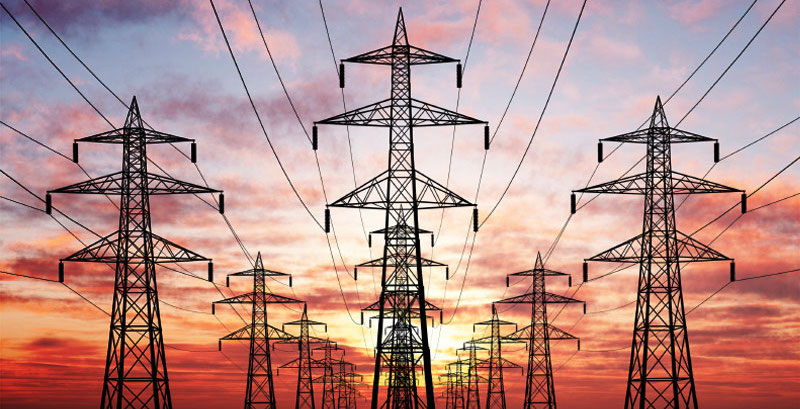

## Table of contents
1. [Overview](#Overview)  
2. [Import and Explore Data](#Import-and-Explore-Data) 
3. [Visualization](#Visualization) 
4. [Time Series Application](#Time-Series-Application)
    1. [Rolling Statistics](#Rolling-Statistics) 
5. [Data Transformation to achieve Stationarity](#Transformation) 
    1. [Log Scale Transformation](#log)
    2. [Shift Transformation](#Shifting)
6. [Components of Time Series](#Components-of-Time-Series) 
7. [Plotting ACF & PACF](#acf-pacf) 
8. [Building Models](#model-RSS) 
9. [Prediction & Reverse transformations](#Prediction-Reverse-transformations) 
    1. [Visualize & Prediction](#Visualize-Prediction) 
    2. [20 years monthly prediction](#future-prediction) 
10. [Conclusion](#Conclusion) 

### OVERVIEW: <a name="Overview"></a>
What is U.S. electricity generation by energy source?

In 2018, about 4,178 billion kilowatthours (kWh) (or 4.18 trillion kWh) of electricity were generated at utility-scale electricity generation facilities in the United States.1 About 63% of this electricity generation was from fossil fuels (coal, natural gas, petroleum, and other gases). About 20% was from nuclear energy, and about 17% was from renewable energy sources. The U.S. Energy Information Administration estimates that an additional 30 billion kWh of electricity generation was from small-scale solar photovoltaic systems in 2018.

The World Energy Outlook 2018 examines future patterns of a changing global energy system at a time of increasing uncertainties and finds that major transformations are underway for the global energy sector, from growing electrification to the expansion of renewables, upheavals in oil production and globalisation of natural gas markets. Across all regions and fuels, policy choices made by governments will determine the shape of the energy system of the future.

WEO 2018 details global energy trends and what possible impact they will have on supply and demand, carbon emissions, air pollution, and energy access. Its scenario-based analysis outlines different possible futures for the energy system, contrasting the path taken by current and planned policies with those that can meet long-term climate goals under the Paris Agreement, reduce air pollution, and ensure universal energy access.

### GOALS:
The goal of this project is to build a Time Series model that can predict the monthly value of Revenue in Dollars, Power Demand in MWH, Number of Customers and Cost per KWH for U.S in the next 20 years.


### HOW DOES THIS PROJECT HELP?
Power Plants, Electrical Companies, Government Agencies and Local Power Producers can utilize this model to predict and monitor power demand and supply in real time to be able to lay out plans in advance to meet the said Electrical Power supply and demand. This will  also help to foresee the said increasing changing global energy system uncertainties. 

### ABOUT THE DATA:
I got the data from the US Energy Information Administration(EIA). The URL to access the data “https://www.eia.gov/electricity/data.php” The data is the monthly revenue, energy consumption in mwh, Number of customers and price per kwh from 1990 to present. Each data for Residential, Commercial and Industrial is collected separately from all the US State and join them together in one data reference to time intervals. This is one of the challenges in joining all the data and put them together in accordance to the date it was collected. Cleaning the data is one I expected to be a challenge too. 

We Got 28 Columns For Revenue, Power Consumptions MWH, Number of Customers and Price in KWH in every sectors like Residential, Commercial, Industrial in every State. We get the total and average to come out for the following dataset
that we can used in the time series. 
* date - year, month and day data collected.
* tot_thous_dlrs - Total Power Revenue in thousand Dollars 	
* tot_mwh - Total Power Consumption in Mega Watt Hour 	
* tot_count -	Total Number of Customers  
* tot_cents_kwh - Average Price in Kilo Watt Hour.


# Import and Explore Data<a name="Import-and-Explore-Data"></a>

### Import Libraries

In [1]:
import numpy as np #for numerical computations
import pandas as pd #for reading & storing data, pre-processing
import matplotlib.pyplot as plt #for visualization
%matplotlib inline 
import seaborn as sns # visualization library
sns.set_style("whitegrid")

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dataes          
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from scipy import stats
from scipy.stats import norm, ttest_ind, chisquare, chi2_contingency, chi2

import os
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') 

In [2]:
df=pd.read_csv('sales_revenue (5).csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,RESIDENTIAL,Unnamed: 5,Unnamed: 6,Unnamed: 7,COMMERCIAL,Unnamed: 9,Unnamed: 10,Unnamed: 11,INDUSTRIAL,Unnamed: 13,Unnamed: 14,Unnamed: 15,TRANSPORTATION,Unnamed: 17,Unnamed: 18,Unnamed: 19,OTHER,Unnamed: 21,Unnamed: 22,Unnamed: 23,TOTAL,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price
1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,1990,1,AK,Final,"17,477","181,752",.,9.62,"15,818","178,259",.,8.87,"3,636","41,610",.,8.74,.,.,.,.,"1,918","14,816",.,12.95,"38,848","416,438",.,9.33
3,1990,1,AL,Final,"123,332","2,070,093",.,5.96,"54,495","820,415",.,6.64,"87,762","2,099,546",.,4.18,.,.,.,.,"2,851","53,954",.,5.28,"268,440","5,044,008",.,5.32
4,1990,1,AR,Final,"72,506","1,026,320",.,7.06,"30,966","474,988",.,6.52,"37,046","782,491",.,4.73,.,.,.,.,"3,117","47,600",.,6.55,"143,635","2,331,399",.,6.16


In [3]:
#Check number of rows and columns
df.shape

(18108, 28)

In [4]:
# Change the column names, I got the name from Row 0 & Row 2
df.columns = ['yr', 'mnt','state','data_status','res_thous_dlrs','res_mwh','res_count','res_cents_kwh','com_thous_dlrs',
'com_mwh','com_count','com_cents_kwh','ind_thous_dlrs','ind_mwh','ind_count','ind_cents_kwh','trans_thous_dlrs',
'trans_mwh','trans_count','trans_cents_kwh','oth_thous_dlrs','oth_mwh','oth_count','oth_cents_kwh','tot_thous_dlrs',
'tot_mwh','tot_count','tot_cents_kwh']

In [5]:
# Check the columns and first 5 rows
df.head()

,yr,mnt,state,data_status,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,trans_thous_dlrs,trans_mwh,trans_count,trans_cents_kwh,oth_thous_dlrs,oth_mwh,oth_count,oth_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh
0,NaN,NaN,NaN,NaN,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price
1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,1990,1,AK,Final,"17,477","181,752",.,9.62,"15,818","178,259",.,8.87,"3,636","41,610",.,8.74,.,.,.,.,"1,918","14,816",.,12.95,"38,848","416,438",.,9.33
3,1990,1,AL,Final,"123,332","2,070,093",.,5.96,"54,495","820,415",.,6.64,"87,762","2,099,546",.,4.18,.,.,.,.,"2,851","53,954",.,5.28,"268,440","5,044,008",.,5.32
4,1990,1,AR,Final,"72,506","1,026,320",.,7.06,"30,966","474,988",.,6.52,"37,046","782,491",.,4.73,.,.,.,.,"3,117","47,600",.,6.55,"143,635","2,331,399",.,6.16


In [6]:
# Drop the 1st 2 rows
df=df.drop([0,1], axis=0)


In [7]:
#Check the the last 5 rows 
df.tail()

,yr,mnt,state,data_status,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,trans_thous_dlrs,trans_mwh,trans_count,trans_cents_kwh,oth_thous_dlrs,oth_mwh,oth_count,oth_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh
18103,2019,7,WA,Preliminary,"238,395","2,453,444","3,126,091",9.72,"207,528","2,415,223","403,412",8.59,"101,811","2,130,102","29,517",4.78,864,"9,166",5,9.42,.,.,.,.,"548,598","7,007,934","3,559,025",7.83
18104,2019,7,WI,Preliminary,"340,073","2,360,613","2,745,999",14.41,"256,517","2,263,524","360,697",11.33,"173,624","2,117,686","5,047",8.20,15,105,2,13.90,.,.,.,.,"770,228","6,741,928","3,111,745",11.42
18105,2019,7,WV,Preliminary,"118,466","1,029,825","854,694",11.50,"63,188","731,805","145,095",8.63,"75,214","1,278,869","11,483",5.88,0,0,0,0.00,.,.,.,.,"256,867","3,040,499","1,011,272",8.45
18106,2019,7,WY,Preliminary,"26,315","221,213","276,816",11.90,"31,117","318,876","59,410",9.76,"56,960","844,641","9,950",6.74,0,0,0,0.00,.,.,.,.,"114,393","1,384,731","346,176",8.26
18107,"The sector, Other, was collected from 1990-200...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Remove the Null values
df = df[:-1]

In [9]:
#Drop the colums w/ to many blank or null values
#Remove anything about transportation cause to many nulls
df=df.drop(['oth_thous_dlrs','oth_mwh','oth_count','oth_cents_kwh','data_status', 'trans_thous_dlrs', 
            'trans_mwh', 'trans_count','trans_cents_kwh'], axis=1)

In [10]:
# Check number of Nulls in each columns
df.isna().sum()

yr                0
mnt               0
state             0
res_thous_dlrs    0
res_mwh           0
res_count         0
res_cents_kwh     0
com_thous_dlrs    0
com_mwh           0
com_count         0
com_cents_kwh     0
ind_thous_dlrs    0
ind_mwh           0
ind_count         0
ind_cents_kwh     0
tot_thous_dlrs    0
tot_mwh           0
tot_count         0
tot_cents_kwh     0
dtype: int64

In [11]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 2 to 18106
Data columns (total 19 columns):
yr                18105 non-null object
mnt               18105 non-null object
state             18105 non-null object
res_thous_dlrs    18105 non-null object
res_mwh           18105 non-null object
res_count         18105 non-null object
res_cents_kwh     18105 non-null object
com_thous_dlrs    18105 non-null object
com_mwh           18105 non-null object
com_count         18105 non-null object
com_cents_kwh     18105 non-null object
ind_thous_dlrs    18105 non-null object
ind_mwh           18105 non-null object
ind_count         18105 non-null object
ind_cents_kwh     18105 non-null object
tot_thous_dlrs    18105 non-null object
tot_mwh           18105 non-null object
tot_count         18105 non-null object
tot_cents_kwh     18105 non-null object
dtypes: object(19)
memory usage: 2.8+ MB


In [12]:
#Check the unique values in each column
categorical = df.select_dtypes(include='object')
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

yr
30
mnt
12
state
51
res_thous_dlrs
17606
res_mwh
18050
res_count
7683
res_cents_kwh
1812
com_thous_dlrs
17467
com_mwh
18040
com_count
7603
com_cents_kwh
1555
ind_thous_dlrs
17240
ind_mwh
18030
ind_count
6157
ind_cents_kwh
1503
tot_thous_dlrs
17872
tot_mwh
18084
tot_count
7681
tot_cents_kwh
1649


In [13]:
#Reset it index to start to zero
df = df.reset_index(drop=True)

In [14]:
#Remove the null values for under count left is complete date from year 2007 to 2019 and name it data 2
df_1 = df[df['com_count']!='.']

In [15]:
#convert string type period(.) to 0 and comma(,) to empty then convert res_count, com_count and ind_object 
#to int for data df

col_num_count = ['res_count','com_count','ind_count','tot_count','com_thous_dlrs',
                 'com_mwh', 'ind_thous_dlrs', 'ind_mwh']


for count in col_num_count:
     df[count] = df[count].str.replace('.', '0').str.replace(',', '').astype('int')

In [16]:
#convert string type number w/ comma(,) to empty then convert to int for data df

col_kwh = ['res_cents_kwh','tot_cents_kwh']

for x in col_kwh:
     df[x] = df[x].astype(float)

In [17]:
#convert string type number w/ comma(,) to empty then convert to int for data df

col_num = ['res_thous_dlrs', 'res_mwh', 'tot_thous_dlrs', 'tot_mwh']

for x in col_num:
     df[x] = df[x].str.replace(',','').astype(int)

In [18]:
#convert some object to integers or float for df
for i in range(0, len(df.columns)):
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors= 'ignore')

In [19]:
#convert some object to integers or float for df
df['com_cents_kwh'].replace(['.', 'NaN'], inplace=True)
df['ind_cents_kwh'].replace(['.', 'NaN'], inplace=True)

for i in range(0, len(df.columns)):
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors= 'ignore')

In [20]:
# Recheck the type of each column
df.dtypes

yr                  int64
mnt                 int64
state              object
res_thous_dlrs      int32
res_mwh             int32
res_count           int32
res_cents_kwh     float64
com_thous_dlrs      int32
com_mwh             int32
com_count           int32
com_cents_kwh     float64
ind_thous_dlrs      int32
ind_mwh             int32
ind_count           int32
ind_cents_kwh     float64
tot_thous_dlrs      int32
tot_mwh             int32
tot_count           int32
tot_cents_kwh     float64
dtype: object

In [21]:
#Convert yr and mnt to string to be able to put the date together
df.loc[:, ['yr', 'mnt']] = df.loc[:, ['yr', 'mnt']].astype(str)

In [22]:
#Add variable that w/ complete date(month, day and year)
df['date'] =  df['mnt'] + '/' + '1' + '/' + df['yr']
df['date'] = pd.to_datetime(df['date'])# parse string to datetime type

In [23]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,yr,mnt,state,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh,date,month_year
0,1990,1,AK,17477,181752,0,9.62,15818,178259,0,8.87,3636,41610,0,8.74,38848,416438,0,9.33,1990-01-01,1990-01
1,1990,1,AL,123332,2070093,0,5.96,54495,820415,0,6.64,87762,2099546,0,4.18,268440,5044008,0,5.32,1990-01-01,1990-01
2,1990,1,AR,72506,1026320,0,7.06,30966,474988,0,6.52,37046,782491,0,4.73,143635,2331399,0,6.16,1990-01-01,1990-01
3,1990,1,AZ,109332,1396499,0,7.83,82694,1081793,0,7.64,43274,809797,0,5.34,243133,3439153,0,7.07,1990-01-01,1990-01
4,1990,1,CA,597161,6168009,0,9.68,508517,6011774,0,8.46,268759,4454664,0,6.03,1406536,17504013,0,8.04,1990-01-01,1990-01


In [24]:
#Convert back yr and mnt to integers to be able to plot them in boxplot 
df.loc[:, ['yr', 'mnt']] = df.loc[:, ['yr', 'mnt']].astype(str)

In [25]:
#dataset from 2007 to 2019 without zero values
df_1 = df[(df['com_count']!= 0) & (df['ind_cents_kwh']!= 0) & ((df['com_cents_kwh']!= 0))]


In [26]:
#Reset it index to start to zero
df_1 = df_1.reset_index(drop=True)

In [27]:
#Group it by date to make it monthly collected data in all State 2007 to 2019
df_grp_yr_1 = df_1.groupby('date').mean()
df_grp_yr_1.head()

,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh
date,,,,,,,,,,,,,,,,
2007-01-01,247035.294118,2.456593e+06,2.011443e+06,10.086471,190837.901961,2.091518e+06,278171.745098,8.914118,98979.549020,1.615382e+06,11481.549020,6.883137,538191.078431,6.178505e+06,2.301115e+06,8.800588
2007-02-01,235615.372549,2.381652e+06,1.998576e+06,10.056667,184513.117647,1.975616e+06,275227.647059,9.099216,94681.803922,1.537094e+06,11388.509804,6.895882,516131.941176,5.908457e+06,2.285210e+06,8.866471
2007-03-01,212829.392157,2.072446e+06,2.018466e+06,10.302549,188169.117647,2.012552e+06,277665.725490,9.072941,100657.470588,1.619264e+06,11748.235294,6.978235,503264.274510,5.718830e+06,2.307898e+06,8.893137
2007-04-01,188142.117647,1.770236e+06,2.009421e+06,10.606471,185865.450980,1.981396e+06,276645.137255,9.130196,101201.019608,1.634537e+06,11585.705882,6.830392,476401.588235,5.398833e+06,2.297670e+06,8.883137
2007-05-01,203624.823529,1.889978e+06,2.018876e+06,10.753725,202517.470588,2.128606e+06,278432.274510,9.223137,107222.705882,1.710609e+06,11730.705882,6.894510,514545.196078,5.741182e+06,2.309057e+06,8.996863


In [28]:
# restore the index name, and move the index back to a column
df_grp_yr_1.index.name = 'date'
df_grp_yr_1.reset_index(inplace=True)

In [29]:
# Group 1 started from 2007 to 2019
df_grp_yr_1['mnts']=df_grp_yr_1.date.dt.month
df_grp_yr_1.head()

,date,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh,mnts
0,2007-01-01,247035.294118,2.456593e+06,2.011443e+06,10.086471,190837.901961,2.091518e+06,278171.745098,8.914118,98979.549020,1.615382e+06,11481.549020,6.883137,538191.078431,6.178505e+06,2.301115e+06,8.800588,1
1,2007-02-01,235615.372549,2.381652e+06,1.998576e+06,10.056667,184513.117647,1.975616e+06,275227.647059,9.099216,94681.803922,1.537094e+06,11388.509804,6.895882,516131.941176,5.908457e+06,2.285210e+06,8.866471,2
2,2007-03-01,212829.392157,2.072446e+06,2.018466e+06,10.302549,188169.117647,2.012552e+06,277665.725490,9.072941,100657.470588,1.619264e+06,11748.235294,6.978235,503264.274510,5.718830e+06,2.307898e+06,8.893137,3
3,2007-04-01,188142.117647,1.770236e+06,2.009421e+06,10.606471,185865.450980,1.981396e+06,276645.137255,9.130196,101201.019608,1.634537e+06,11585.705882,6.830392,476401.588235,5.398833e+06,2.297670e+06,8.883137,4
4,2007-05-01,203624.823529,1.889978e+06,2.018876e+06,10.753725,202517.470588,2.128606e+06,278432.274510,9.223137,107222.705882,1.710609e+06,11730.705882,6.894510,514545.196078,5.741182e+06,2.309057e+06,8.996863,5


In [30]:
df_grp_yr_1.shape

(151, 18)

In [31]:
df_TS = df_grp_yr_1[['date', 'tot_thous_dlrs', 'tot_mwh', 'tot_count', 'tot_cents_kwh']]
df_TS.head() 

,date,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh
0,2007-01-01,538191.078431,6.178505e+06,2.301115e+06,8.800588
1,2007-02-01,516131.941176,5.908457e+06,2.285210e+06,8.866471
2,2007-03-01,503264.274510,5.718830e+06,2.307898e+06,8.893137
3,2007-04-01,476401.588235,5.398833e+06,2.297670e+06,8.883137
4,2007-05-01,514545.196078,5.741182e+06,2.309057e+06,8.996863


In [32]:
#This data group is from 1990 t0 2019
#Groupby by year to fixed the date time from year/month/date
df_grp_yr = df.groupby('date').mean()

In [33]:
# restore the index name, and move the index back to a column
df_grp_yr.index.name = 'date'
df_grp_yr.reset_index(inplace=True)
df_grp_yr.head()

,date,res_thous_dlrs,res_mwh,res_count,res_cents_kwh,com_thous_dlrs,com_mwh,com_count,com_cents_kwh,ind_thous_dlrs,ind_mwh,ind_count,ind_cents_kwh,tot_thous_dlrs,tot_mwh,tot_count,tot_cents_kwh
0,1990-01-01,134143.137255,1.870985e+06,0.0,7.106078,84945.000000,1.225470e+06,0.0,6.677451,67692.882353,1.474268e+06,0.0,4.883137,295905.666667,4.723032e+06,0.0,6.232745
1,1990-02-01,109251.117647,1.460752e+06,0.0,7.360784,79810.686275,1.115923e+06,0.0,6.848235,67085.411765,1.462873e+06,0.0,4.891569,264995.921569,4.183580e+06,0.0,6.302941
2,1990-03-01,106724.196078,1.409839e+06,0.0,7.405490,82177.000000,1.136862e+06,0.0,6.907451,69297.333333,1.506705e+06,0.0,4.886471,267186.960784,4.197396e+06,0.0,6.315882
3,1990-04-01,98335.960784,1.278247e+06,0.0,7.526471,79724.705882,1.107465e+06,0.0,6.833137,68103.333333,1.494866e+06,0.0,4.802941,255347.392157,4.021014e+06,0.0,6.274314
4,1990-05-01,98165.039216,1.232961e+06,0.0,7.726471,84528.647059,1.155703e+06,0.0,6.888824,71375.764706,1.544290e+06,0.0,4.839216,263534.705882,4.081405e+06,0.0,6.333922


# Visualization<a name="Visualization"></a>

## Monthly Boxplot

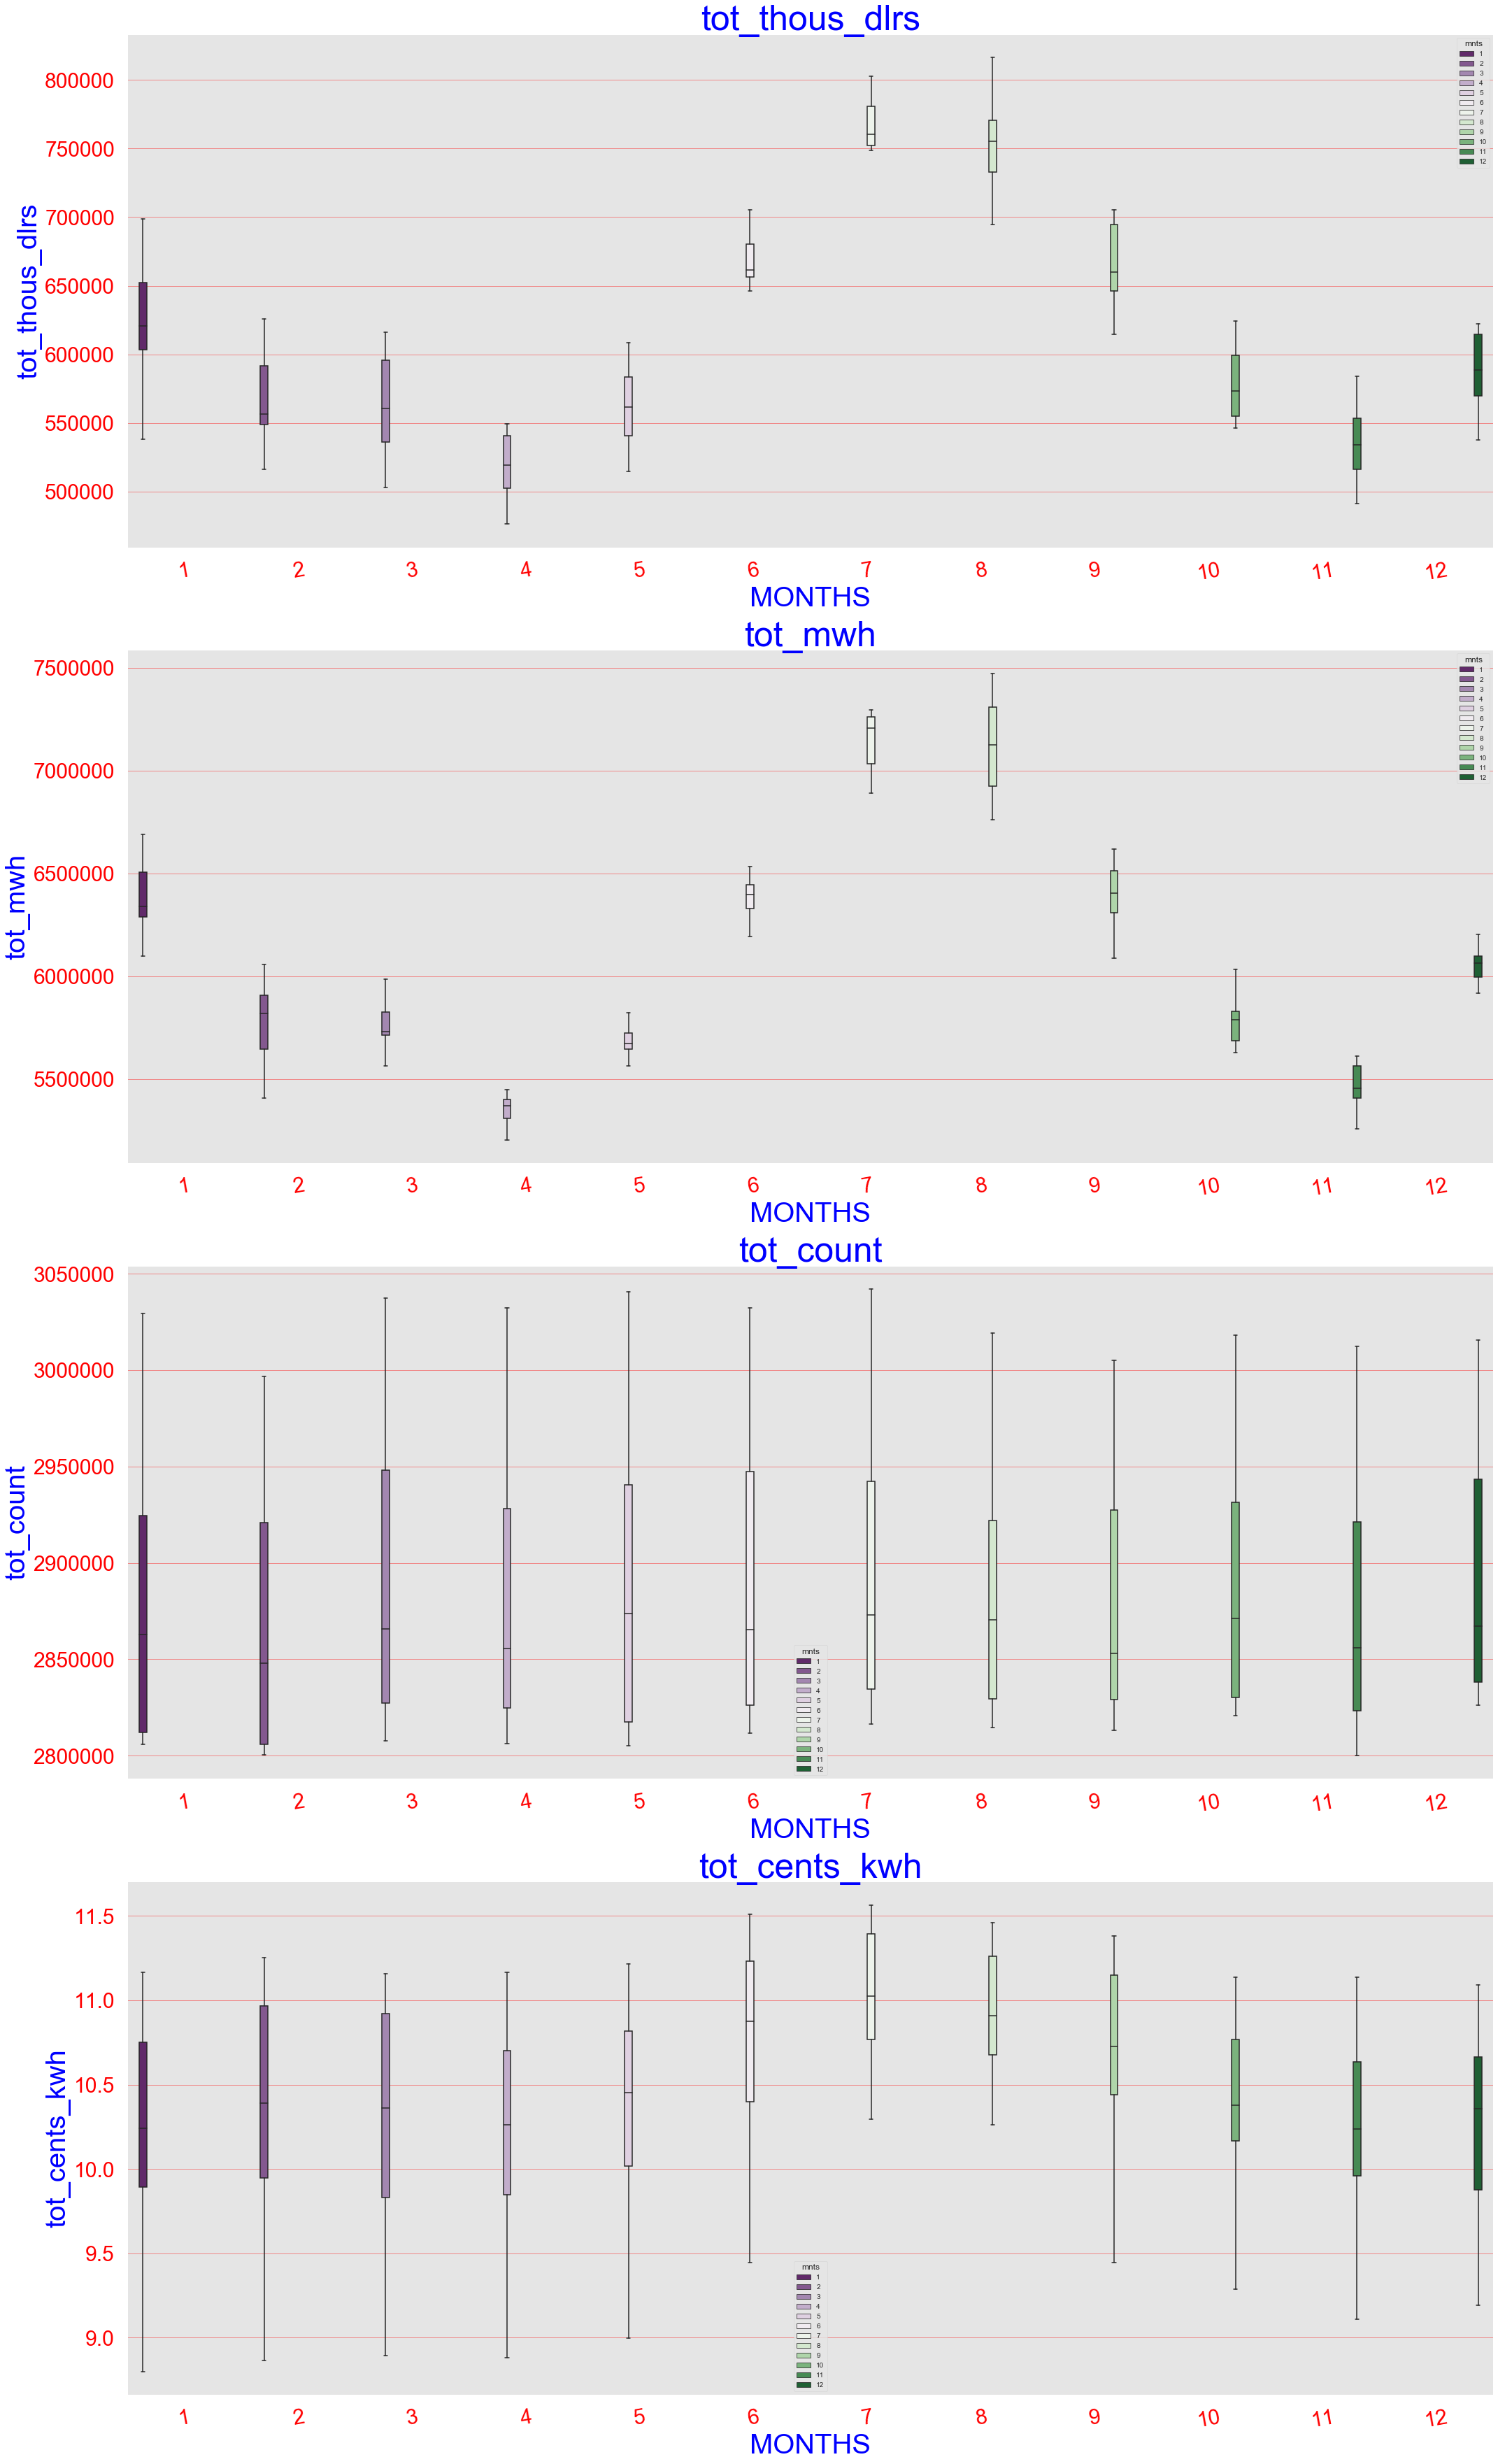

In [34]:
dic_col = {'tot_thous_dlrs':1, 'tot_mwh':2, 'tot_count':3, 'tot_cents_kwh':4}


plt.figure(figsize=(35,25))

for variable,i in dic_col.items():
    plt.subplot(4,1,i)
    #sns.hist(df_grp_yr_1[variable])
    sns.boxplot(x="mnts", 
            y=variable, 
            hue="mnts",
            data=df_grp_yr_1, 
            palette="PRGn",
            showfliers=False)
            
    plt.xticks(fontsize=30, rotation=10)
    plt.yticks(fontsize=30)
    plt.xlabel('MONTHS', fontsize=40, color='blue')
    plt.ylabel(variable, fontsize=40, color='blue')
    plt.subplots_adjust(top=2)
    plt.tick_params(direction='out', length=2, width=2, colors='r',
    grid_color='r', grid_alpha=.5, size = 15)
    plt.title(variable, size = 50, color='blue')
    
plt.show();

#### In the monthly barplot shown above, the Revenue in thousand dollars and consumption in MWH is peak during summer from June to Aug. The total number of customers monthly is almost the same in a year. The Cost is almost the same monthly but a little bit higher during summer.

## Yearly Bar Plot 

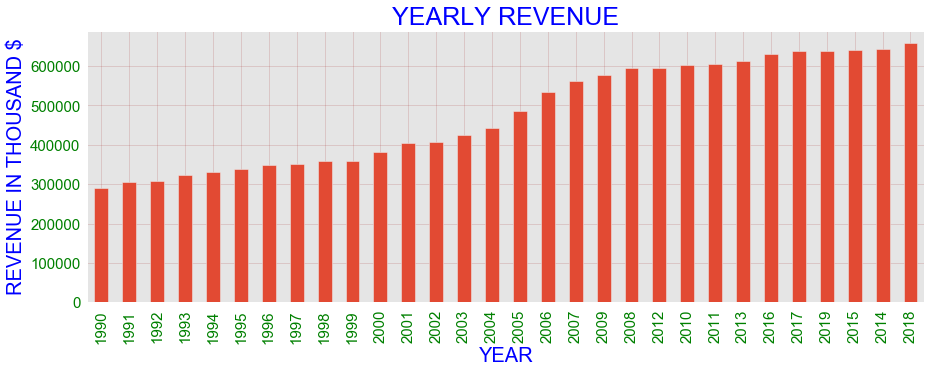

In [35]:
df.groupby('yr').tot_thous_dlrs.mean().sort_values().plot(kind='bar', figsize=[15,5])
plt.ylabel('REVENUE IN THOUSAND $', fontsize=20, color='blue')
#plt.ylim([7000,9000])
plt.xlabel('YEAR', fontsize=20, color='blue')
plt.title('YEARLY REVENUE', size = 25, color='blue')

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

   
plt.tick_params( colors='g', grid_color='brown', grid_alpha=.2)

#### The top 4 with highest yearly revenue are 2018, 2014, 2015 & 2019 respectively but the total consumption in year 2019 will be computed together at end of december.

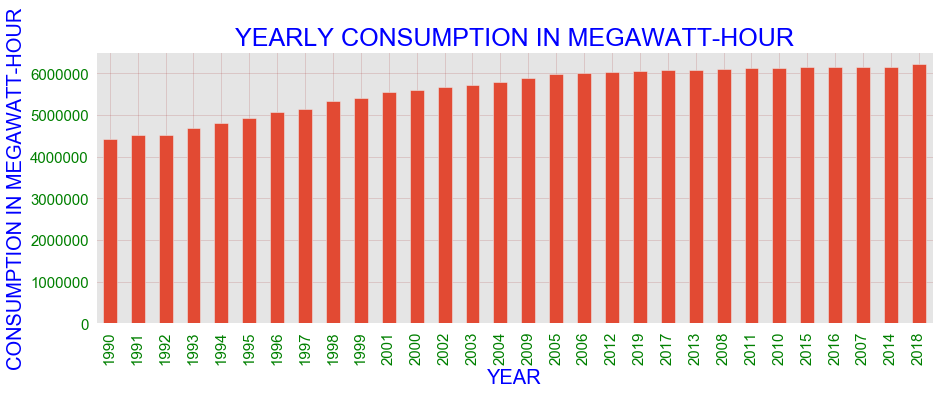

In [36]:
df.groupby('yr').tot_mwh.mean().sort_values().plot(kind='bar', figsize=[15,5])

plt.ylabel('CONSUMPTION IN MEGAWATT-HOUR', fontsize=20, color='blue')
#plt.ylim([7000,9000])
plt.xlabel('YEAR', fontsize=20, color='blue')
plt.title('YEARLY CONSUMPTION IN MEGAWATT-HOUR', size = 25, color='blue')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.tick_params( colors='g', grid_color='brown', grid_alpha=.2)

#### The top 4 with highest yearly consumption are 2018, 2014, 2007 & 2016 respectively but the total consumption in year 2019 will be computed together at end of december.

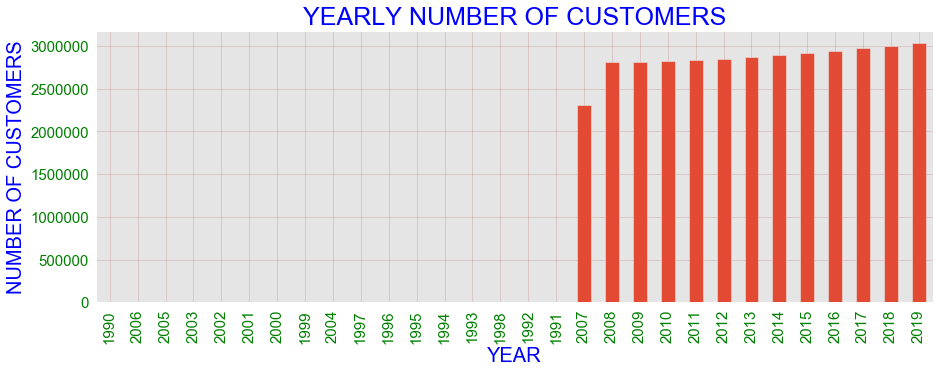

In [37]:
df.groupby('yr').tot_count.mean().sort_values().plot(kind='bar', figsize=[15,5])

plt.ylabel('NUMBER OF CUSTOMERS', fontsize=20, color='blue')
#plt.ylim([7000,9000])
plt.xlabel('YEAR', fontsize=20, color='blue')
plt.title('YEARLY NUMBER OF CUSTOMERS', size = 25, color='blue')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.tick_params( colors='g', grid_color='brown', grid_alpha=.2)

#### The top 4 with highest yearly number of customers are 2019, 2018, 2017 & 2016 respectively it noted that number of customoers are increasing every year. There is a drop in the 2007 & this is the effect of the economy went down in 2008 and also the number of customers were started to be recorded in year 2007.

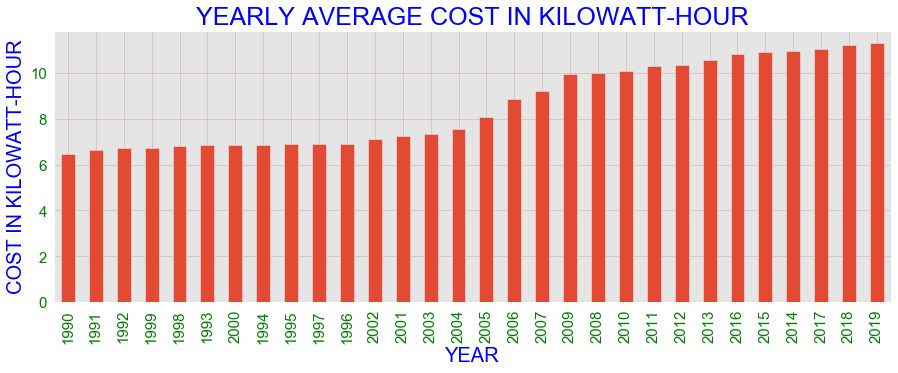

In [38]:
df.groupby('yr').tot_cents_kwh.mean().sort_values().plot(kind='bar', figsize=[15,5])

plt.ylabel('COST IN KILOWATT-HOUR', fontsize=20, color='blue')
#plt.ylim([7000,9000])
plt.xlabel('YEAR', fontsize=20, color='blue')
plt.title('YEARLY AVERAGE COST IN KILOWATT-HOUR', size = 25, color='blue')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.tick_params( colors='g', grid_color='brown', grid_alpha=.2)

#### The top 4 with highest yearly cost are 2019, 2018, 2017 & 2014 respectively it noted that number of customers are increasing every year. There is also an increase in 2014.

## Histogram to check distribution of our data

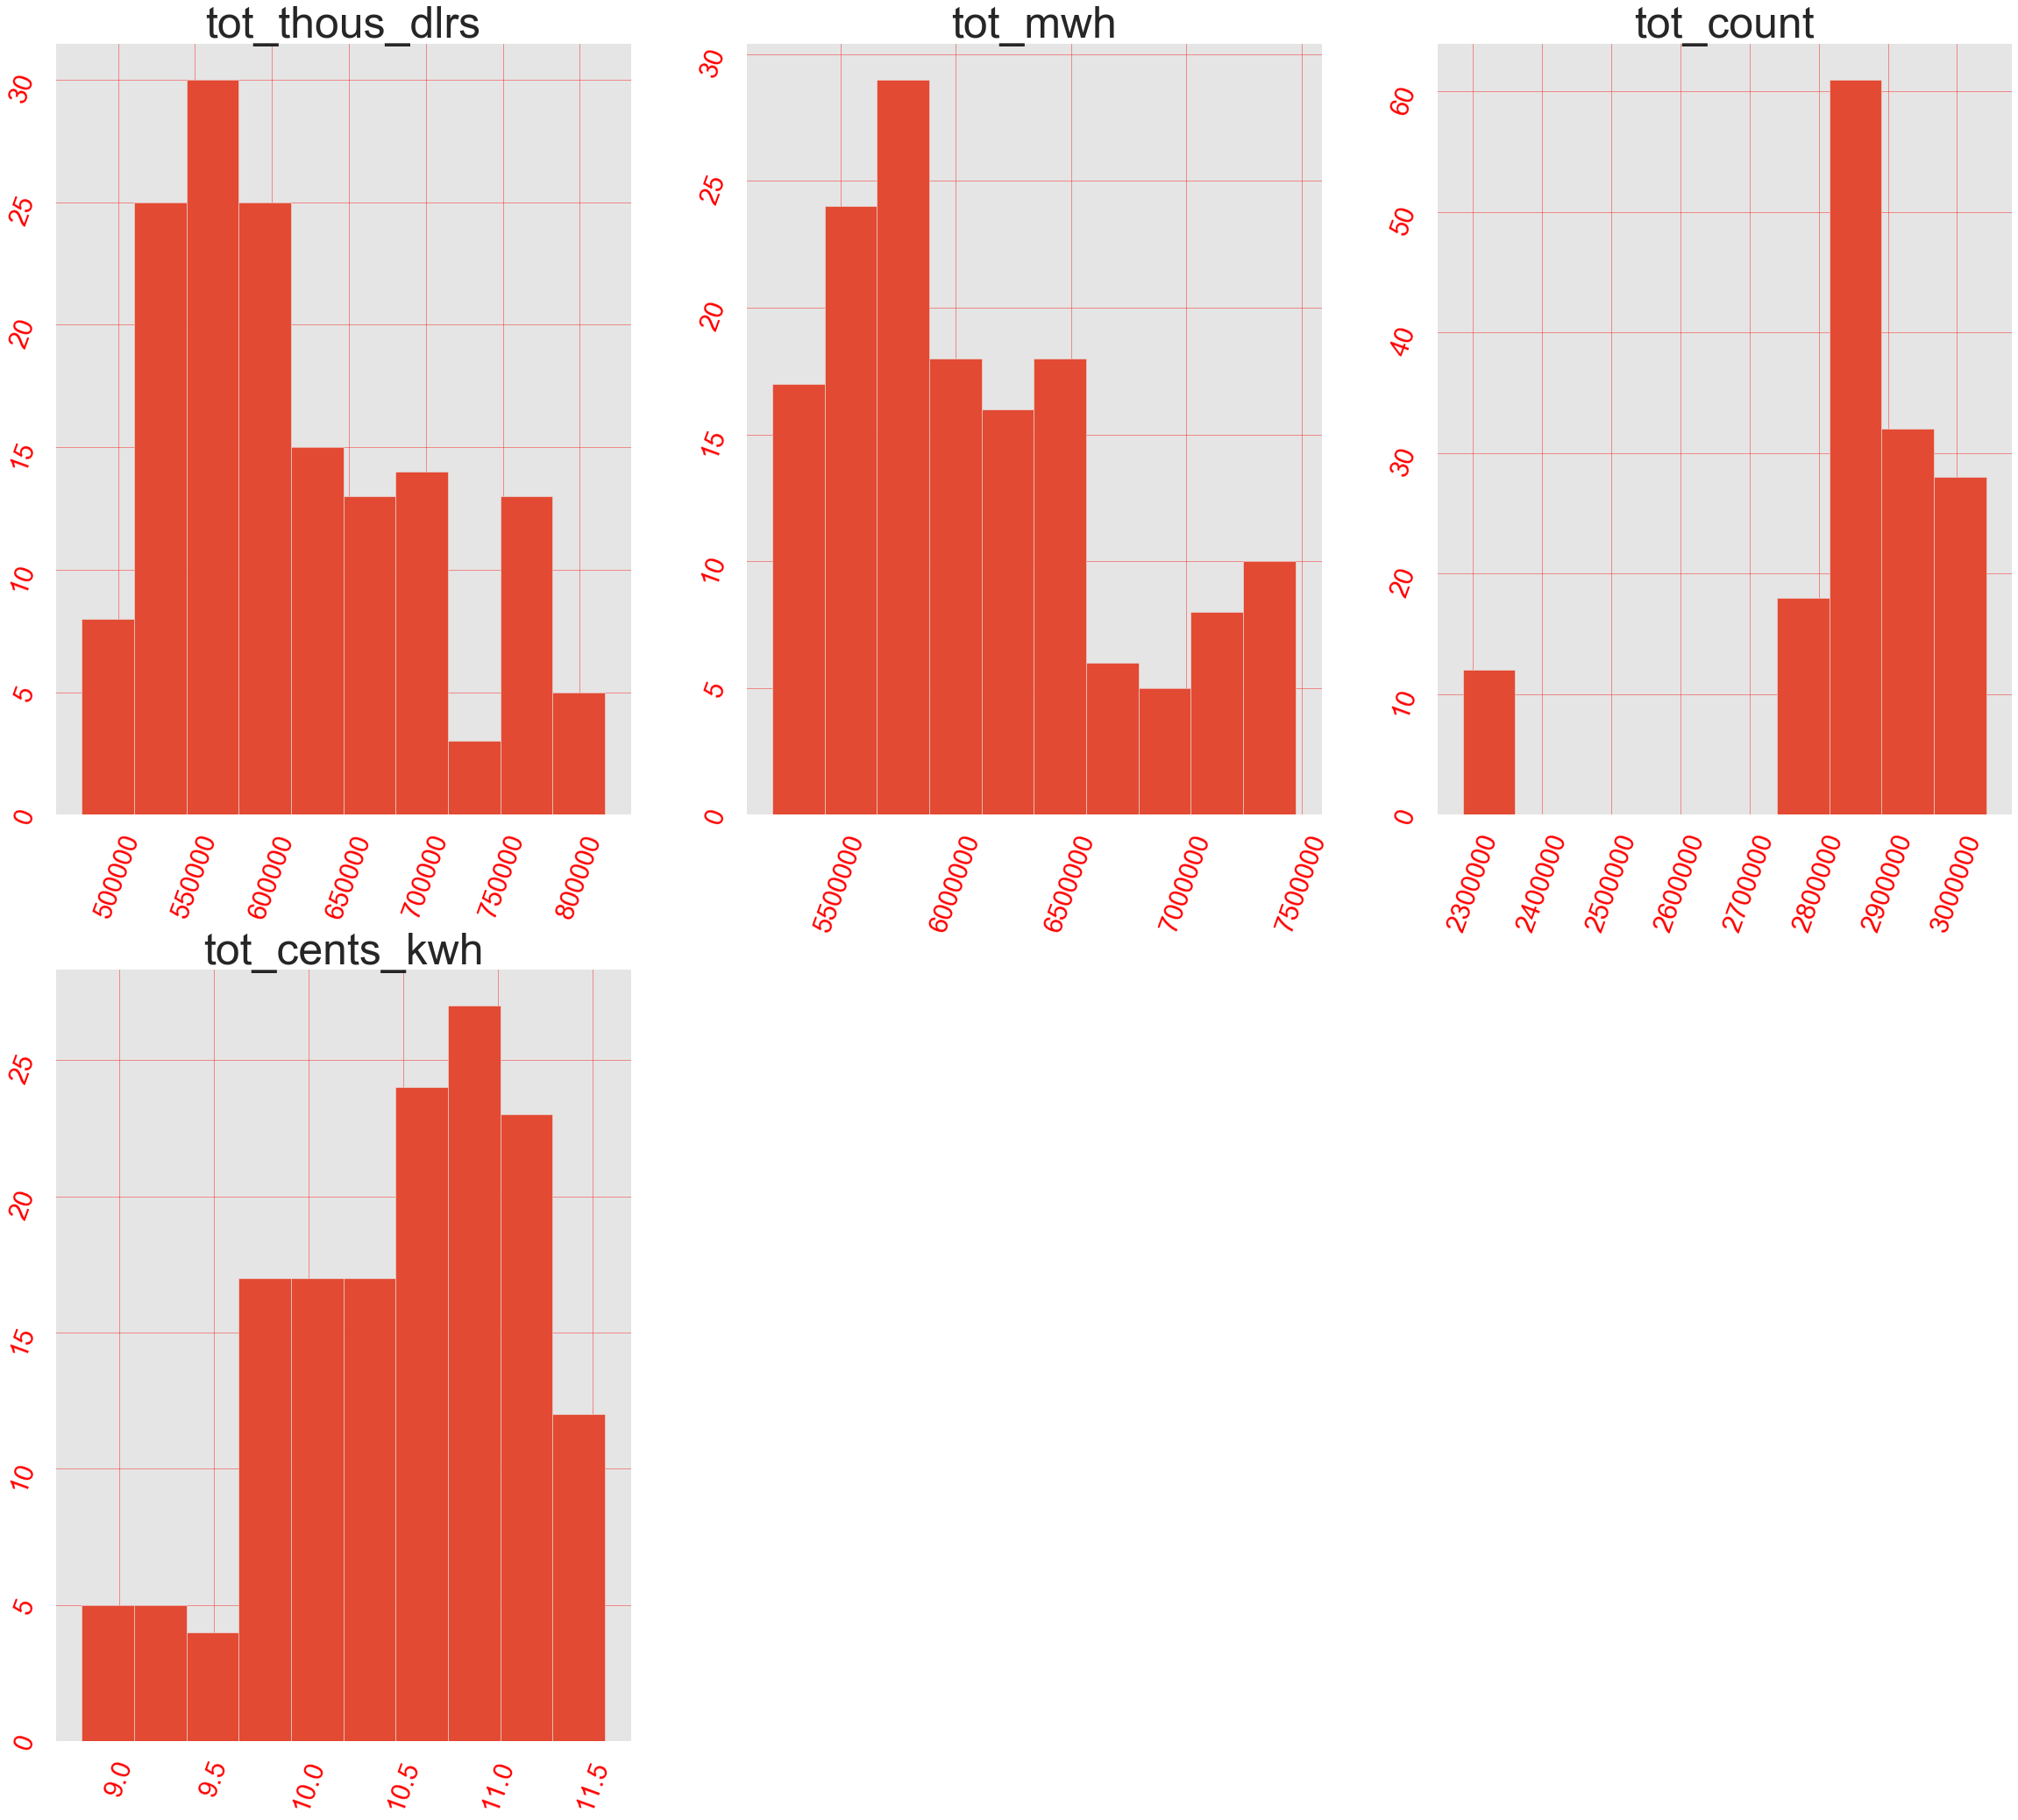

In [39]:
dic_col = {'tot_thous_dlrs':1, 'tot_mwh':2, 'tot_count':3, 'tot_cents_kwh':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(40,30))

for variable,i in dic_col.items():
    plt.subplot(4,3,i)
    plt.hist(df_grp_yr_1[variable])
  
    plt.xticks(fontsize=30, rotation=70)
    plt.yticks(fontsize=30, rotation=70)
    #plt.xlabel('xlabel', fontsize=10)
    #plt.ylabel('ylabel', fontsize=30)
    plt.subplots_adjust(top=2)
    plt.tick_params(direction='out', length=2, width=2, colors='r',
               grid_color='r', grid_alpha=.5, size = 15)
    plt.title(variable, size = 50)

#### The histogram of all the total revenue(tot_thous_dlrs), Consumption(tot_mwh), Consumer(tot_count), Cost(tot_cents_kwh) are not quite Normality distributed. Some values are shifted to the left or to the right of the mean. There are also outliers noted outlier. 

# Time Series Application<a name="Time-Series-Application"></a>

In [40]:
#For total Revenue, year 2007 to 2019 for combining residential, commercial & Industrial  
df_rev = df_grp_yr_1[['date','tot_thous_dlrs']]
df_rev = df_rev.set_index(['date'])
print('\nTOTAL REVENUE:\n', df_rev.head())

#For Sales(Consumption) in Mega Watt Hour, year 2007 to 2019 for combining residential, commercial & Industrial  
df_mwh = df_grp_yr_1[['date','tot_mwh']]
df_mwh = df_mwh.set_index(['date'])
print('\nCONSUMPTION IN MEGAWATTHOUR:\n', df_mwh.head())

#For total Count of users, year 2007 to 2019 for combining residential, commercial & Industrial  
df_count = df_grp_yr_1[['date','tot_count']]
#df_count = df_grp_yr.loc[228:, ['date', 'tot_count']]
df_count = df_count.set_index(['date'])
print('\nNUMBER OF CUSTOMERS:\n', df_count.head())

#For Average Cost in cent kilowatthour for residential, commercial & Industrial  
df_cost = df_grp_yr_1[['date','tot_cents_kwh']]
df_cost = df_cost.set_index(['date'])
print('\nAVERAGE COST KWH:\n', df_cost.head())



TOTAL REVENUE:
             tot_thous_dlrs
date                      
2007-01-01   538191.078431
2007-02-01   516131.941176
2007-03-01   503264.274510
2007-04-01   476401.588235
2007-05-01   514545.196078

CONSUMPTION IN MEGAWATTHOUR:
                  tot_mwh
date                    
2007-01-01  6.178505e+06
2007-02-01  5.908457e+06
2007-03-01  5.718830e+06
2007-04-01  5.398833e+06
2007-05-01  5.741182e+06

NUMBER OF CUSTOMERS:
                tot_count
date                    
2007-01-01  2.301115e+06
2007-02-01  2.285210e+06
2007-03-01  2.307898e+06
2007-04-01  2.297670e+06
2007-05-01  2.309057e+06

AVERAGE COST KWH:
             tot_cents_kwh
date                     
2007-01-01       8.800588
2007-02-01       8.866471
2007-03-01       8.893137
2007-04-01       8.883137
2007-05-01       8.996863


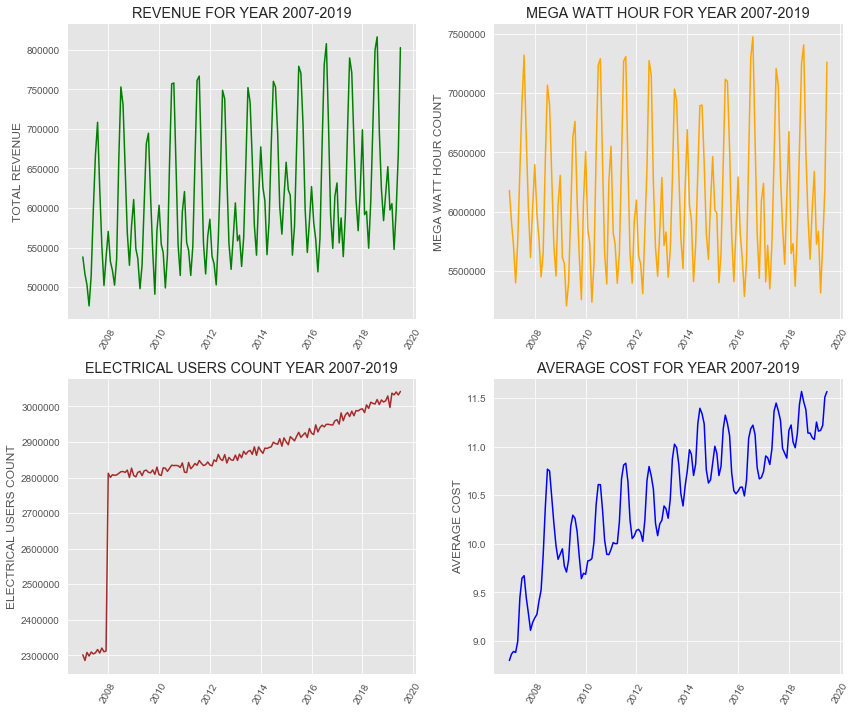

In [41]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(df_rev, color='green')
plt.ylabel('TOTAL REVENUE')
plt.title('REVENUE FOR YEAR 2007-2019')
plt.xticks(rotation=60)

plt.subplot(222)
plt.plot(df_mwh, color='orange')
plt.ylabel('MEGA WATT HOUR COUNT')
plt.title('MEGA WATT HOUR FOR YEAR 2007-2019')
plt.xticks(rotation=60)

plt.subplot(223)
plt.plot(df_count, color='brown')
plt.ylabel('ELECTRICAL USERS COUNT')
plt.title('ELECTRICAL USERS COUNT YEAR 2007-2019')
plt.xticks(rotation=60)

plt.subplot(224)
plt.plot(df_cost , color='blue')
plt.ylabel('AVERAGE COST')
plt.title('AVERAGE COST FOR YEAR 2007-2019')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

#### Visually seeing the graph Revenue has a trend and seasonality. Consumption in MWH look like it don't have trend but have seasonality. The consumer count has a trend, seasonality and random. Im sure this the effect of the Economy recession happen during 2008, there is a sudden drop and sudden rise when the market is beginning to grow again. The drop is not shown for data was started to be collected in year 2007. For here we will remove the sudden rise by beginning the data in year 2009 to 2019. The cost in kwh is has a trend and seasonality. We will statistically check the stationarity later on this project. 

#### Below we remove 2007-2008 and start the time series count of customers in year 2009 to 2019.


(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

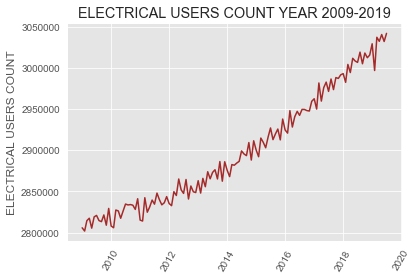

In [42]:
#For total Count of users, year 2009 to 2018 for combining residential, commercial & Industrial  
df_count = df_grp_yr.loc[228:, ['date', 'tot_count']] #starting 2009-2018
df_count = df_count.set_index(['date'])

plt.plot(df_count, color='brown')
plt.ylabel('ELECTRICAL USERS COUNT')
plt.title('ELECTRICAL USERS COUNT YEAR 2009-2019')
plt.xticks(rotation=60)

# Rolling Statistics<a name="Rolling-Statistics"></a>

In [43]:
#Determine rolling statistics(mean & standard deviation)
rolmean_rev = df_rev.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd_rev = df_rev.rolling(window=12).std()

rolmean_mwh = df_mwh.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd_mwh = df_mwh.rolling(window=12).std()

rolmean_count = df_count.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd_count = df_count.rolling(window=12).std()

rolmean_cost = df_cost.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd_cost = df_cost.rolling(window=12).std()

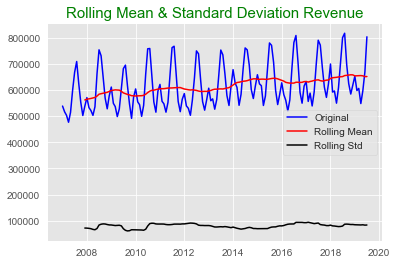

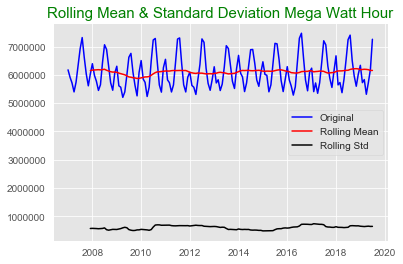

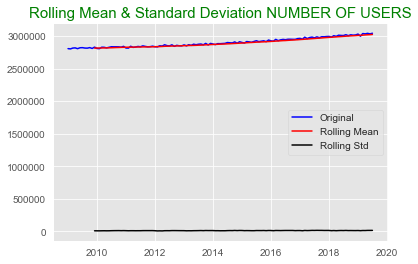

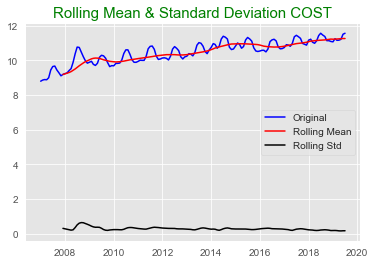

In [44]:
#Plot rolling statistics
orig = plt.plot(df_rev, color='blue', label='Original')
mean = plt.plot(rolmean_rev, color='red', label='Rolling Mean')
std = plt.plot(rolstd_rev, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Revenue',  color='green', size= 15)
plt.show(block=False)


orig = plt.plot(df_mwh, color='blue', label='Original')
mean = plt.plot(rolmean_mwh, color='red', label='Rolling Mean')
std = plt.plot(rolstd_mwh, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Mega Watt Hour', color='green', size= 15)
plt.show(block=False)

orig = plt.plot(df_count, color='blue', label='Original')
mean = plt.plot(rolmean_count, color='red', label='Rolling Mean')
std = plt.plot(rolstd_count, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation NUMBER OF USERS', color='green', size= 15)
plt.show(block=False)

orig = plt.plot(df_cost, color='blue', label='Original')
mean = plt.plot(rolmean_cost, color='red', label='Rolling Mean')
std = plt.plot(rolstd_cost, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation COST', color='green', size= 15)
plt.show(block=False)
         




#### Seen in the statistical graph shown above, rolling mean in red line shows an increasing trend in the revenue, consumption/sale in Megawatthour needed, number of customers and Cost in kwh. All the rolling std deviation is fairly constand w/ time. There is some also some seasonality in the revenue, consumption/sale in Megawatthour needed and Cost in kwh. Visually we can say that there is seasonality in number of customers. But for our time series to be stationary, we need to ensure that both the rolling mean and standard deviation are parallel to the x-axis. We prove stationality by the hypothesis below.      


# Augmented Dickey–Fuller test (ADCF) test<a name="Augmented Dickey–Fuller test (ADCF) test"></a>
   #### To statisticaly check the stationality of our Time Series

In [45]:
#Perform Augmented Dickey–Fuller test for REVENUE:
print('\nDickey Fuller Test for REVENUE:')
dftest_rev = adfuller(df_rev['tot_thous_dlrs'], autolag='AIC')
dfoutput_rev = pd.Series(dftest_rev[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_rev[4].items():
    dfoutput_rev['Critical Value (%s)'%key] = value
print(dfoutput_rev)

#Perform Augmented Dickey–Fuller test for MEGAWATTHOUR POWER USAGE:
print('\nDickey Fuller Test for POWER CONSUMTION/SALE IN MEGAWATTHOUR:')
dftest_mwh = adfuller(df_mwh['tot_mwh'], autolag='AIC')
dfoutput_mwh = pd.Series(dftest_mwh[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_mwh[4].items():
    dfoutput_mwh['Critical Value (%s)'%key] = value
print(dfoutput_mwh)

#Perform Augmented Dickey–Fuller test for TOTAL NUMBER OF POWER USERS:
print('\nDickey Fuller Test for TOTAL NUMBER OF CUSTOMERS:')
dftest_count = adfuller(df_count['tot_count'], autolag='AIC')
dfoutput_count = pd.Series(dftest_count[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_count[4].items():
    dfoutput_count['Critical Value (%s)'%key] = value
print(dfoutput_count)

#Perform Augmented Dickey–Fuller test for KILOWATTHOUR COST:
print('\nDickey Fuller Test for AVERAGE KILOWATTHOUR COST:')
dftest_cost = adfuller(df_cost['tot_cents_kwh'], autolag='AIC')
dfoutput_cost = pd.Series(dftest_cost[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_cost[4].items():
    dfoutput_cost['Critical Value (%s)'%key] = value
print(dfoutput_cost)





Dickey Fuller Test for REVENUE:
Test Statistic                  -1.473659
p-value                          0.546499
#Lags Used                      12.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64

Dickey Fuller Test for POWER CONSUMTION/SALE IN MEGAWATTHOUR:
Test Statistic                  -2.719974
p-value                          0.070645
#Lags Used                      12.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64

Dickey Fuller Test for TOTAL NUMBER OF CUSTOMERS:
Test Statistic                   5.863663
p-value                          1.000000
#Lags Used                      11.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)      

**For a Time series to be stationary, its ADCF test should have:**
1. **p-value to be low usually less than .05 (Null hypothesis = Time Series is not stationary )**
2. **The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics**
3. **If the test statistic is less than the critical value, we can say that time series is stationary**

#### The p-values of all our time series(revenue, consumption/sale in Megawatthour needed, number of customers and Cost in kwh) are above 0.05. We can say that Null hypothesis is True, meaning that all the Time Series is **not tationary**. We can observe also that the critical values of our time series are not close to the test statistic. 


# Data Transformation to achieve Stationarity<a name="Transformation"></a>


#### There are ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift etc.

#### In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: parallel to x-axis) for time series and rolling mean after taking log.

## Log Transformation  <a name="log"></a>

In [46]:
#So let us logscale our data to help in stationarity  & respond to skewness towards large values and estimating trend
df_rev_lgscale = np.log(df_rev)
df_mwh_lgscale = np.log(df_mwh)
df_count_lgscale = np.log(df_count)
df_cost_lgscale = np.log(df_cost)


In [47]:
df_rev_lgscale.head()

,tot_thous_dlrs
date,
2007-01-01,13.195969
2007-02-01,13.154118
2007-03-01,13.128871
2007-04-01,13.074016
2007-05-01,13.151039


## Shifting Transformation  <a name="Shifting"></a>

### Let us test the Time Series stationarity with our function

In [48]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    

### Test our Time Series Revenue

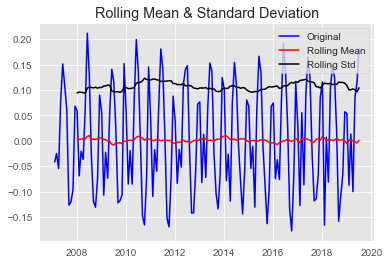

Results of Dickey Fuller Test:
Test Statistic                  -4.655253
p-value                          0.000102
#Lags Used                      11.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [49]:
df_rev_LogDiffShifting = df_rev_lgscale - df_rev_lgscale.shift()

# Test stationary for df_rev_LogDiffShifting
df_rev_LogDiffShifting.dropna(inplace=True)
test_stationarity(df_rev_LogDiffShifting)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_rev_LogDiffShifting['tot_thous_dlrs'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

#### Our graph shows the original revenue, rolling mean and rolling std our parallel/constant w/ the x-axis/time and shows that the time series revenue is stationary and this statistically proven by the p-value equal 0.000036 w/c less than .05 means we reject the null hypothesis. And also, Our Critical values are near -3.45 is almost near with our test statistic -4.  

### Test our Time Series sale/consumption in mwh

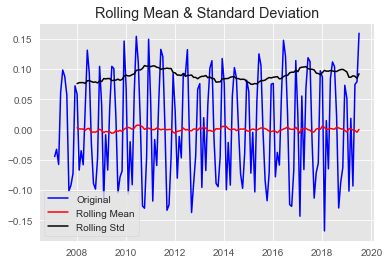

Results of Dickey Fuller Test:
Test Statistic                  -5.527190
p-value                          0.000002
#Lags Used                      11.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [50]:
df_mwh_LogDiffShifting = df_mwh_lgscale - df_mwh_lgscale.shift()

# Test stationary for df_rev_LogDiffShifting
df_mwh_LogDiffShifting.dropna(inplace=True)
test_stationarity(df_mwh_LogDiffShifting)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_mwh_LogDiffShifting['tot_mwh'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

#### Our graph shows the original mwh, rolling mean and rolling std our parallel/constant w/ the x-axis/time and shows that the time series revenue is stationary and this statistically proven by the p-value equal 0.000002 w/c less than .05 means we reject the null hypothesis. And also, Our Critical values are improve -3.45 is almost near with our test statistic -5, but the point here is that our test statistic is less than our critical values.¶

### Test our Time Series Count of number of customers

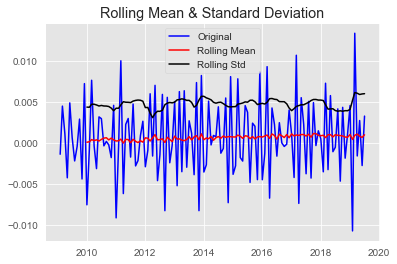

Results of Dickey Fuller Test:
Test Statistic                  -2.122441
p-value                          0.235587
#Lags Used                      13.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [51]:
df_count_LogDiffShifting = df_count_lgscale - df_count_lgscale.shift()

# Test stationary for df_rev_LogDiffShifting
df_count_LogDiffShifting.dropna(inplace=True)
test_stationarity(df_count_LogDiffShifting)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_count_LogDiffShifting['tot_count'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

#### OH NO!!! ITS NOT STATIONARY!!! In the graph we can not distinguish if our number of customer time series is stationary for it is almost flat, parallel w/ the x-axis. Our test shows that our p-value is  0.235587 way above .05, meaning we can not reject our null hypothesis = Time Series NOT stationary. So we have to do again differencing until our Time series count will be stationary. Our Test statistic and critical values is not near, but the point here is that our test statistic is less than our critical values.

#### Let us do again another differencing 

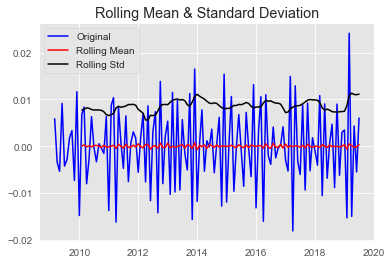

Results of Dickey Fuller Test:
Test Statistic                -7.490947e+00
p-value                        4.507313e-11
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


In [52]:
df_count_LogDiffShifting_2 = df_count_LogDiffShifting - df_count_LogDiffShifting.shift()

# Test stationary for df_rev_LogDiffShifting
df_count_LogDiffShifting_2.dropna(inplace=True)
test_stationarity(df_count_LogDiffShifting_2)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_count_LogDiffShifting_2['tot_count'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

#### YES! we got now our p-value went down from 0.235587 to 4.507313e-11  w/c less than .05 means we reject now the null hypothesis. But Our Critical values are -3.45 is almost near with our test statistic -7, but the point here is that our test statistic is less than our critical values. But the point now here is that we can apply now model ARIMA. We done differencing twice so our "I" in the ARIMA will be 2.¶

### Test our Time Series cost in kwh

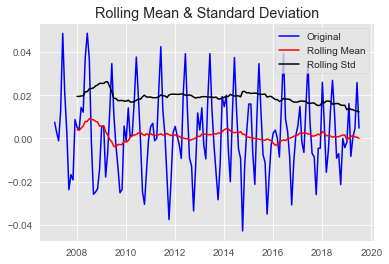

Results of Dickey Fuller Test:
Test Statistic                  -3.095250
p-value                          0.026907
#Lags Used                      13.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [53]:
df_cost_LogDiffShifting = df_cost_lgscale - df_cost_lgscale.shift()

# Test stationary for df_rev_LogDiffShifting
df_cost_LogDiffShifting.dropna(inplace=True)
test_stationarity(df_cost_LogDiffShifting)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_cost_LogDiffShifting['tot_cents_kwh'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

#### Our graph shows the original cost in kwh, rolling mean and rolling std our parallel/constant w/ the x-axis/time and shows that the time series revenue is stationary and this statistically proven by the p-value equal 6.578984e-08 w/c less than .05 means we reject the null hypothesis.  And also, Our Critical values are almost equal -3.47 and -3.09, but the point here is that our test statistic is less than our critical values.

# Components of Time Series<a name="Components-of-Time-Series"></a>
### Let us now break down the 3 components of the log scale series using a system libary function. 
   

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
def season_decompose(data_scale):
    print('Weekly')
    run_decompose = seasonal_decompose(data_scale.dropna(), model='additive', freq=(5)) # 5trading days/week
    run_decompose.plot()
    plt.show()

    # RUN Yearly 
    print('Yearly')
    run_decompose = seasonal_decompose(data_scale.dropna(), model='additive', freq=(12)) # 12 months/ yearly
    run_decompose.plot()
    plt.show()
   

    

### Three components Revenue Series

Weekly


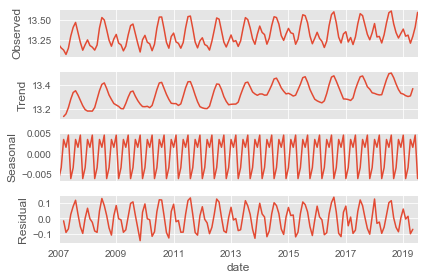

Yearly


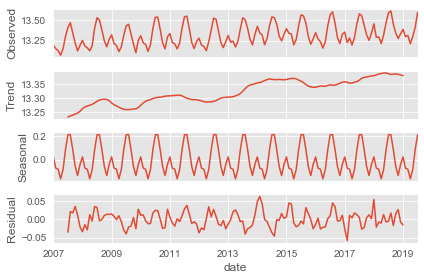

In [56]:
season_decompose(df_rev_lgscale)

### Three components Sale/Consumption in mwh series

Weekly


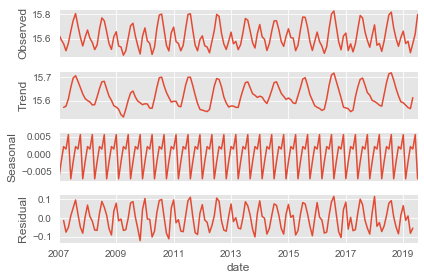

Yearly


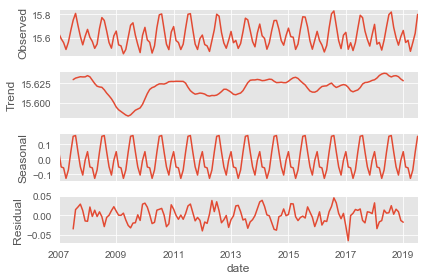

In [57]:
season_decompose(df_mwh_lgscale)

### Three components Count of Number of customers series

Weekly


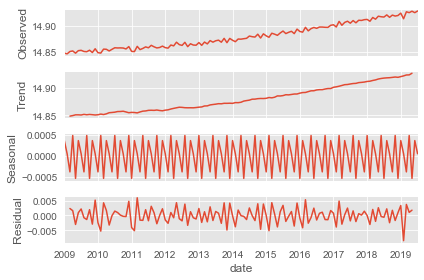

Yearly


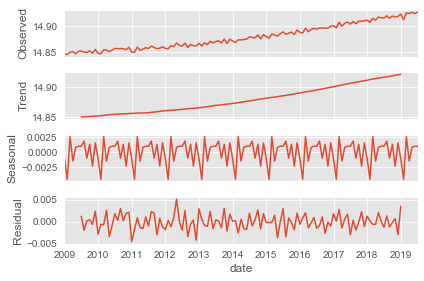

In [58]:
season_decompose(df_count_lgscale)

### Three components Cost in kwh series

Weekly


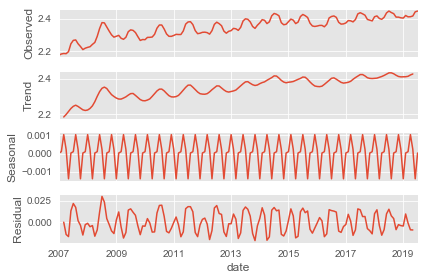

Yearly


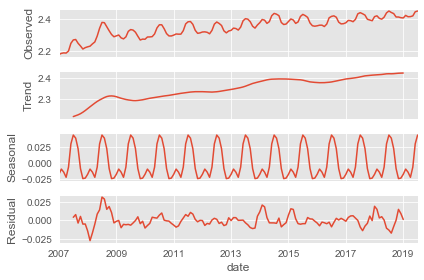

In [59]:
season_decompose(df_cost_lgscale)

# Plotting ACF & PACF<a name="acf-pacf"></a> 
#### ARIMA(P, D, Q) model divided into 3, AR = P is the past values, I = D is the level of differencing, and MA = Q is adjusting to past errors.

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [61]:
#ACF & PACF plots
def acf_pacf(data_2):
    
    lag_acf = acf(data_2, nlags=20)
    lag_pacf = pacf(data_2, nlags=20, method='ols')

    #Plot ACF:
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(data_2)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data_2)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')            

    #Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(data_2)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data_2)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
            
    plt.tight_layout() 

In [62]:
def autocorrelation_model(name, x):
    plot_acf(pd.Series(x), lags=50, alpha=.05)
    plt.title('{} - Autocorrelation Function'.format(name))
    plt.show()

    plot_pacf(pd.Series(x), lags=50, alpha=0.05)
    plt.title('{} - Partial Autocorrelation Function'.format(name))
    plt.show()

### Finding AR and MA for Revenue Series using ACF & PACF 

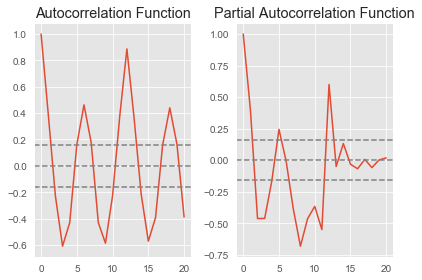

In [63]:
# ACF/PACF for Revenue
acf_pacf(df_rev_LogDiffShifting)

#### From the ACF graph, we see that curve touches y = 0.0 line at x=2. Thus, from theory, Q = 2. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2. We did diferrencing once so D = 1. Our model will be ARIMA(2,1,2).

### Finding AR and MA for Sale/Consumption in mwh series using ACF & PACF 

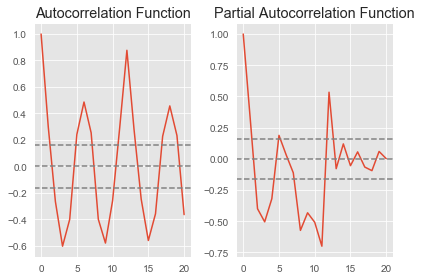

In [64]:
acf_pacf(df_mwh_LogDiffShifting)

#### From the ACF graph, we see that curve touches y = 0.0 line at x=2. Thus, from theory, Q = 2. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2. We did diferrencing once so D = 1. Our model will be ARIMA(2,1,2).

### Finding AR and MA for Count of Number of customers series using ACF & PACF 

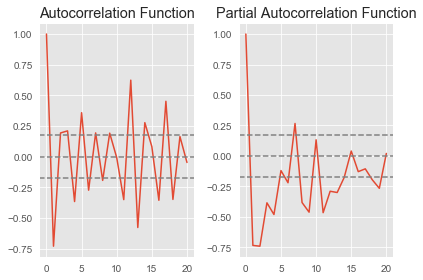

In [65]:
acf_pacf(df_count_LogDiffShifting_2)

#### From the ACF graph, we see that curve touches y = 0.0 line at x=1. Thus, from theory, Q = 1. From the PACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, P = 1. We did diferrencing twice so D = 2. Our model will be ARIMA(1,2,1).

### Finding AR and MA Cost in kwh series using ACF & PACF 

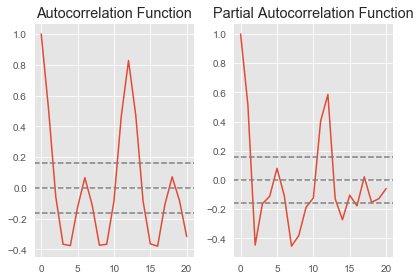

In [66]:
acf_pacf(df_cost_LogDiffShifting)

#### From the ACF graph, we see that curve touches y = 0.0 line at x=3. Thus, from theory, Q = 3. From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2. We did diferrencing once so D = 1. Our model will be ARIMA(2,1,3).

In [67]:
'''
#### Function to help find the best order 
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(df_count_lgscale, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue'''


'\n#### Function to help find the best order \nimport itertools\np=d=q=range(0,5)\npdq = list(itertools.product(p,d,q))\n\nfor param in pdq:\n    try:\n        model_arima = ARIMA(df_count_lgscale, order=param)\n        model_arima_fit = model_arima.fit()\n        print(param, model_arima_fit.aic)\n    except:\n        continue'

#### I put it string coz it take minutes to run

# Building Models<a name="model-RSS"></a>
## Finding the best model order using RSS & AIC
**ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. These models will give a value of RSS. Lower Residual Sum of Square(RSS) error values indicate a better model.**

### Check the RSS of Revenue Series

In [68]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_rev_lgscale, order=(8,1,6))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:       D.tot_thous_dlrs   No. Observations:                  150
Model:                 ARIMA(8, 1, 6)   Log Likelihood                 295.701
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 30 Oct 2019   AIC                           -559.402
Time:                        13:28:39   BIC                           -511.232
Sample:                    02-01-2007   HQIC                          -539.832
                         - 07-01-2019                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0011      0.001      1.100      0.273      -0.001       0.003
ar.L1.D.tot_thous_dlrs     0.4503      0.039     11.406      0.000       0.373       0.528
ar.L

RSS_AR: 0.3802
RSS_MA: 0.5840
RSS_ARIMA: 0.1768


Text(0.5, 1.0, 'RSS_ARIMA: 0.1768')

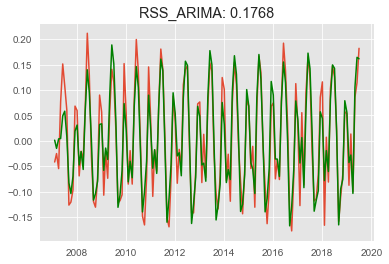

In [69]:
#ARIMA(2,1,2)
#(8,1,6) best
#AR Model
model_rev_AR = ARIMA(df_rev_lgscale, order=(8,1,0))
results_rev_AR = model_rev_AR.fit()
print('RSS_AR: %.4f'%sum((results_rev_AR.fittedvalues - df_rev_LogDiffShifting['tot_thous_dlrs'])**2))

#MA Model
model_rev_MA = ARIMA(df_rev_lgscale, order=(0,1,6))
results_rev_MA = model_rev_MA.fit()
print('RSS_MA: %.4f'%sum((results_rev_MA.fittedvalues - df_rev_LogDiffShifting['tot_thous_dlrs'])**2))

# AR+I+MA = ARIMA model
model_rev_ARIMA = ARIMA(df_rev_lgscale, order=(8,1,6))
results_rev_ARIMA = model_rev_ARIMA.fit()
print('RSS_ARIMA: %.4f'%sum((results_rev_ARIMA.fittedvalues - df_rev_LogDiffShifting['tot_thous_dlrs'])**2))

#Plot the best model
plt.plot(df_rev_LogDiffShifting)
plt.plot(results_rev_ARIMA.fittedvalues, color='green')
plt.title('RSS_ARIMA: %.4f'%sum((results_rev_ARIMA.fittedvalues - df_rev_LogDiffShifting['tot_thous_dlrs'])**2))





#### Shown is the RSS value of the three models AR, MA, ARIMA. By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 0.7112, indicating ARIMA to be better than its individual component models.

### Check the RSS of Sale/Consumption in mwh Series

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_mwh_lgscale, order=(3,1,8))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D.tot_mwh   No. Observations:                  150
Model:                 ARIMA(3, 1, 8)   Log Likelihood                 249.284
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 30 Oct 2019   AIC                           -472.569
Time:                        13:29:18   BIC                           -433.431
Sample:                    02-01-2007   HQIC                          -456.668
                         - 07-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000      0.755      0.451      -0.000       0.001
ar.L1.D.tot_mwh     0.2914        nan        nan        nan         nan         nan
ar.L2.D.tot_mwh    -0.2900      

RSS_AR: 0.6344
RSS_MA: 0.5755
RSS_ARIMA: 0.2983


Text(0.5, 1.0, 'RSS_ARIMA: 0.2983')

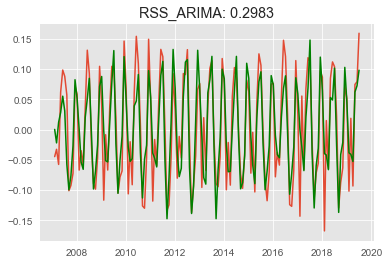

In [71]:
#ARIMA(2,1,2)
# (2,1,4)good
#(3,1,4)best
#AR Model
model_mwh_AR = ARIMA(df_mwh_lgscale, order=(3,1,0))
results_mwh_AR = model_mwh_AR.fit(disp=-1)
print('RSS_AR: %.4f'%sum((results_mwh_AR.fittedvalues - df_mwh_LogDiffShifting['tot_mwh'])**2))

#MA Model
model_mwh_MA = ARIMA(df_mwh_lgscale, order=(0,1,4))
results_mwh_MA = model_mwh_MA.fit(disp=-1)
print('RSS_MA: %.4f'%sum((results_mwh_MA.fittedvalues - df_mwh_LogDiffShifting['tot_mwh'])**2))

# AR+I+MA = ARIMA model
model_mwh_ARIMA = ARIMA(df_mwh_lgscale, order=(3,1,8))
results_mwh_ARIMA = model_mwh_ARIMA.fit(disp=-1)
print('RSS_ARIMA: %.4f'%sum((results_mwh_ARIMA.fittedvalues - df_mwh_LogDiffShifting['tot_mwh'])**2))

#Plot the best model
plt.plot(df_mwh_LogDiffShifting)
plt.plot(results_mwh_ARIMA.fittedvalues, color='green')
plt.title('RSS_ARIMA: %.4f'%sum((results_mwh_ARIMA.fittedvalues - df_mwh_LogDiffShifting['tot_mwh'])**2))





#### Shown is the RSS value of the three models AR, MA, ARIMA. By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 0.3574, indicating ARIMA to be better than its individual component models.

### Check the RSS of count of customer series


In [72]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_count_lgscale, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:            D.tot_count   No. Observations:                  126
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 560.493
Method:                       css-mle   S.D. of innovations              0.003
Date:                Wed, 30 Oct 2019   AIC                          -1108.987
Time:                        13:29:30   BIC                          -1091.969
Sample:                    02-01-2009   HQIC                         -1102.073
                         - 07-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0006   8.45e-05      7.569      0.000       0.000       0.001
ar.L1.D.tot_count    -1.3065      0.098    -13.284      0.000      -1.499      -1.114
ar.L2.D.tot_count    -0.

RSS_AR: 0.0010
RSS_ARIMA: 0.0010


Text(0.5, 1.0, 'RSS_ARIMA: 0.0010')

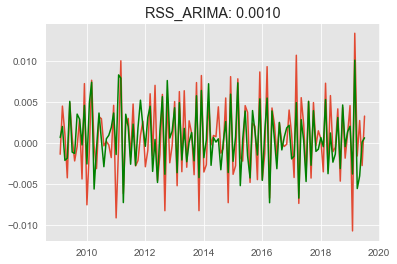

In [73]:
#ARIMA(2,1,2)best
#ARIMA(1,1,8)
#ARIMA(4,1,2)

model_count_AR = ARIMA(df_count_lgscale, order=(2,1,0))
results_count_AR = model_count_AR.fit()
print('RSS_AR: %.4f'%sum((results_count_AR.fittedvalues - df_count_LogDiffShifting['tot_count'])**2))

#MA Model(error: 0,1,2)
#model_count_MA = ARIMA(df_count_lgscale, order=(0,1,2))
#results_count_MA = model_count_MA.fit()
#print('RSS_MA: %.4f'%sum((results_count_MA.fittedvalues - df_count_LogDiffShifting['tot_count'])**2))

# AR+I+MA = ARIMA model
model_count_ARIMA = ARIMA(df_count_lgscale, order=(2,1,2))
results_count_ARIMA = model_count_ARIMA.fit()
print('RSS_ARIMA: %.4f'%sum((results_count_ARIMA.fittedvalues - df_count_LogDiffShifting['tot_count'])**2))

#Plot the best model
plt.plot(df_count_LogDiffShifting)
plt.plot(results_count_ARIMA.fittedvalues, color='green')
plt.title('RSS_ARIMA: %.4f'%sum((results_count_ARIMA.fittedvalues - df_count_LogDiffShifting['tot_count'])**2))





#### Shown is the RSS value of the three models AR, MA, ARIMA. By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 0.0011, error occur when doing the MA model. indicating ARIMA to be better than its individual component models.

### Check the RSS of cost in kwh series

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_cost_lgscale, order=(0,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:        D.tot_cents_kwh   No. Observations:                  150
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 421.790
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 30 Oct 2019   AIC                           -833.580
Time:                        13:29:32   BIC                           -818.527
Sample:                    02-01-2007   HQIC                          -827.464
                         - 07-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0018      0.002      0.921      0.358      -0.002       0.006
ma.L1.D.tot_cents_kwh     0.6864      0.112      6.127      0.000       0.467       0.906
ma.L2.D.

RSS_AR: 0.0194
RSS_MA: 0.0316
RSS_ARIMA: 0.0146


Text(0.5, 1.0, 'RSS_ARIMA: 0.0146')

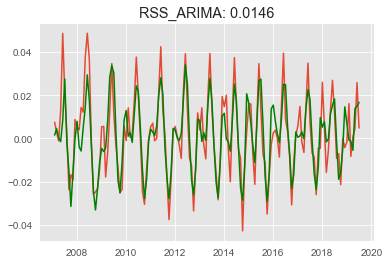

In [75]:
#ARIMA(2,1,3)
#ARIMA(2,1,1)
#ARIMA(4,1,3)good model
##ARIMA(8,1,3)best model
model_cost_AR = ARIMA(df_cost_lgscale, order=(8,1,0))
results_cost_AR = model_cost_AR.fit(disp=-1)
print('RSS_AR: %.4f'%sum((results_cost_AR.fittedvalues - df_cost_LogDiffShifting['tot_cents_kwh'])**2))

#MA Model
model_cost_MA = ARIMA(df_cost_lgscale, order=(0,1,3))
results_cost_MA = model_cost_MA.fit(disp=-1)
print('RSS_MA: %.4f'%sum((results_cost_MA.fittedvalues - df_cost_LogDiffShifting['tot_cents_kwh'])**2))

# AR+I+MA = ARIMA model
model_cost_ARIMA = ARIMA(df_cost_lgscale, order=(8,1,3))
results_cost_ARIMA = model_cost_ARIMA.fit(disp=-1)
print('RSS_ARIMA: %.4f'%sum((results_cost_ARIMA.fittedvalues - df_cost_LogDiffShifting['tot_cents_kwh'])**2))

#Plot the best model
plt.plot(df_cost_LogDiffShifting)
plt.plot(results_cost_ARIMA.fittedvalues, color='green')
plt.title('RSS_ARIMA: %.4f'%sum((results_cost_ARIMA.fittedvalues - df_cost_LogDiffShifting['tot_cents_kwh'])**2))





#### Shown is the RSS value of the three models AR, MA, ARIMA. By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 0.0146, indicating ARIMA to be better than its individual component models.

# Prediction & Reverse transformations<a name="Prediction-Reverse-transformations"></a>
#### Before we do any plots for predictions ,we apply exponent to reconvert  back to original form. We applied log to the data series during the 1st phase to help to make our data stationary so our model was built on log transformed data.

In [76]:
#Revenue Time Series
predictions_ARIMA_diff_rev = pd.Series(results_rev_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_rev.head()

date
2007-02-01    0.001105
2007-03-01   -0.015037
2007-04-01    0.003622
2007-05-01    0.004427
2007-06-01    0.048934
dtype: float64

In [77]:
#Revenue Time Series
predictions_ARIMA_diff_cumsum_rev = predictions_ARIMA_diff_rev.cumsum()#Convert to cumulative sum
predictions_ARIMA_diff_cumsum_rev.head()

date
2007-02-01    0.001105
2007-03-01   -0.013932
2007-04-01   -0.010310
2007-05-01   -0.005882
2007-06-01    0.043051
dtype: float64

In [78]:
#Revenue Time Series Prediction
predictions_ARIMA_log_rev = pd.Series(df_rev_lgscale['tot_thous_dlrs'].iloc[0], index=df_rev_lgscale.index)
predictions_ARIMA_log_rev = predictions_ARIMA_log_rev.add(predictions_ARIMA_diff_cumsum_rev, fill_value=0)



In [79]:
predictions_ARIMA_log_rev.head()

date
2007-01-01    13.195969
2007-02-01    13.197074
2007-03-01    13.182037
2007-04-01    13.185659
2007-05-01    13.190086
dtype: float64

In [80]:
#Revenue Time Series
predictions_ARIMA_rev = np.exp(predictions_ARIMA_log_rev)
predictions_ARIMA_rev.head() 


date
2007-01-01    538191.078431
2007-02-01    538786.060252
2007-03-01    530745.079517
2007-04-01    532671.051838
2007-05-01    535034.474928
dtype: float64

In [81]:
#Revenue
predictions_ARIMA_diff_rev = pd.Series(results_rev_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum_rev = predictions_ARIMA_diff_rev.cumsum()#Convert to cumulative sum


#Megawatthour
predictions_ARIMA_diff_mwh = pd.Series(results_mwh_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum_mwh = predictions_ARIMA_diff_mwh.cumsum()#Convert to cumulative sum

#number of customer count
predictions_ARIMA_diff_count = pd.Series(results_count_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum_count = predictions_ARIMA_diff_count.cumsum()#Convert to cumulative sum

#number of customer count
predictions_ARIMA_diff_cost = pd.Series(results_cost_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum_cost = predictions_ARIMA_diff_cost.cumsum()#Convert to cumulative sum

In [82]:
# Revenue
predictions_ARIMA_log_rev = pd.Series(df_rev_lgscale['tot_thous_dlrs'].iloc[0], index=df_rev_lgscale.index)
predictions_ARIMA_log_rev = predictions_ARIMA_log_rev.add(predictions_ARIMA_diff_cumsum_rev, fill_value=0)
predictions_ARIMA_rev = np.exp(predictions_ARIMA_log_rev)

# mwh
predictions_ARIMA_log_mwh = pd.Series(df_mwh_lgscale['tot_mwh'].iloc[0], index=df_mwh_lgscale.index)
predictions_ARIMA_log_mwh = predictions_ARIMA_log_mwh.add(predictions_ARIMA_diff_cumsum_mwh, fill_value=0)
predictions_ARIMA_mwh = np.exp(predictions_ARIMA_log_mwh)

# number count of users 
predictions_ARIMA_log_count = pd.Series(df_count_lgscale['tot_count'].iloc[0], index=df_count_lgscale.index)
predictions_ARIMA_log_count = predictions_ARIMA_log_count.add(predictions_ARIMA_diff_cumsum_count, fill_value=0)
predictions_ARIMA_count = np.exp(predictions_ARIMA_log_count)

# Cost
predictions_ARIMA_log_cost = pd.Series(df_cost_lgscale['tot_cents_kwh'].iloc[0], index=df_cost_lgscale.index)
predictions_ARIMA_log_cost = predictions_ARIMA_log_cost.add(predictions_ARIMA_diff_cumsum_cost, fill_value=0)
predictions_ARIMA_cost = np.exp(predictions_ARIMA_log_cost)


# Visualize and Evaluate  Prediction<a name="Visualize-Prediction"></a>

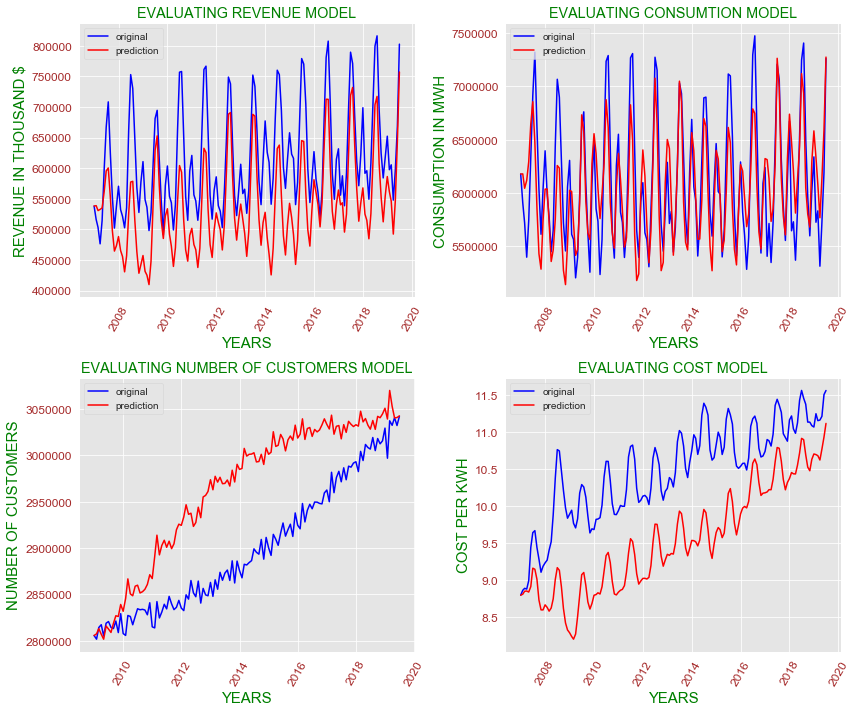

In [83]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(df_rev, color = 'blue', label='original')
plt.plot(predictions_ARIMA_rev, color = 'red', label='prediction')
plt.ylabel('REVENUE IN THOUSAND $', fontsize=15,color= 'green')
plt.xlabel('YEARS', fontsize=15,color= 'green')
plt.xticks(fontsize=12, rotation=60, color= 'brown')
plt.yticks(fontsize=12, color= 'brown')
plt.legend(loc='best')
plt.title('EVALUATING REVENUE MODEL', color= 'green')
plt.subplots_adjust(top=4)

plt.subplot(222)

plt.plot(df_mwh, color = 'blue', label='original')
plt.plot(predictions_ARIMA_mwh, color = 'red', label='prediction')
plt.ylabel('CONSUMPTION IN MWH', fontsize=15,color= 'green')
plt.xlabel('YEARS', fontsize=15,color= 'green')
plt.xticks(fontsize=12, rotation=60, color= 'brown')
plt.yticks(fontsize=12, color= 'brown')
plt.legend(loc='best')
plt.title('EVALUATING CONSUMTION MODEL', color= 'green')
plt.subplots_adjust(top=4)

plt.subplot(223)

plt.plot(df_count, color = 'blue', label='original')
plt.plot(predictions_ARIMA_count, color = 'red', label='prediction')
plt.ylabel('NUMBER OF CUSTOMERS', fontsize=15,color= 'green')
plt.xlabel('YEARS', fontsize=15,color= 'green')
plt.xticks(fontsize=12, rotation=60, color= 'brown')
plt.yticks(fontsize=12, color= 'brown')
plt.legend(loc='best')
plt.title('EVALUATING NUMBER OF CUSTOMERS MODEL', color= 'green')
plt.subplots_adjust(top=4)


plt.subplot(224)

plt.plot(df_cost, color = 'blue', label='original')
plt.plot(predictions_ARIMA_cost, color = 'red', label='prediction')
plt.ylabel('COST PER KWH', fontsize=15,color= 'green')
plt.xlabel('YEARS', fontsize=15,color= 'green')
plt.xticks(fontsize=12, rotation=60, color= 'brown')
plt.yticks(fontsize=12, color= 'brown')
plt.legend(loc='best')
plt.title('EVALUATING COST MODEL', color= 'green')
plt.subplots_adjust(top=4)

plt.tight_layout()
plt.show()

#### In the Revenue Model,  the predicted graph red in color follows well the original graph blue in color. This says the ARIMA Model for Revenue is a pretty accurate model.

#### In the Consumption model in mwh, the predicted graph follows well the original graph. This show also a pretty good model.

#### In the Number of customers model, The predicted graph follows the trend of the original model but it has a variance from year 2010 to year 2018. It look like it follows the seasonality and trend is going up too. In general this is a fair mode.

#### In the Cost Model, the predicted graph follow well the original graph  but there is variance from 2009 to 2019. In general this is a good model. 

# Use Model to predict the next 20 years<a name="future-prediction"></a>

### 20 years prediction for  REVENUE 

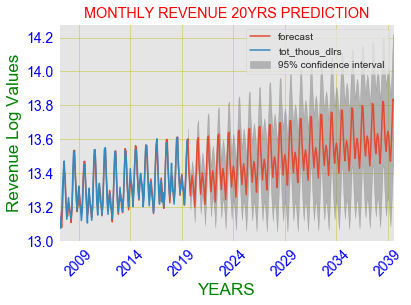

In [84]:
#We have 151 data + 12mnt*20yrs(existing data of 12 month time series interval 20 years) data points. 
results_rev_ARIMA.plot_predict(1,391) 
plt.ylabel('Revenue Log Values', fontsize=17,color= 'green')
plt.xlabel('YEARS', fontsize=17,color= 'green')
plt.xticks(fontsize=14, rotation=45, color= 'brown')
plt.yticks(fontsize=14, color= 'brown')
plt.legend(loc='best')
plt.title('MONTHLY REVENUE 20YRS PREDICTION', color= 'red')
plt.tick_params( length=2, width=2, colors='b',
grid_color='y', grid_alpha=.5)

#### In the graph shown, it shows a steady increase trend for Revenue in the next 20 years, for example the monthly predicted Revenue for on the date 2039-08-01 is 983,044.68 in Thousand dollar equal $983,044,000 million for whole US(Total of all State) for the date Aug. 1, 2039.

In [85]:
#Prediction not converted with date 
results_rev_ARIMA.predict(1,391).tail()

2039-04-01   -0.066143
2039-05-01    0.096205
2039-06-01    0.135118
2039-07-01    0.135127
2039-08-01   -0.011429
Freq: MS, dtype: float64

In [86]:
#Monthly Revenue Prediction till 2039
rev = results_rev_ARIMA.forecast(steps=391) 
print('NUMBER OF MONTHS',len(rev[0]))
print('\nPER MONTH PREDICTED REVENUE:\n', np.round(np.exp(rev[0]), 2))

NUMBER OF MONTHS 391

PER MONTH PREDICTED REVENUE:
 [ 807196.49  674244.6   628590.06  576697.12  618038.58  651411.7
  622943.46  591971.08  540341.86  608607.98  696695.02  798431.12
  812670.17  691521.1   633461.64  582570.28  629863.84  659904.75
  631024.86  600288.74  548285.71  616088.82  705812.91  809277.15
  821401.69  700768.58  641309.2   590715.91  639035.22  668871.58
  640486.9   607892.8   556174.79  624208.16  714842.71  820005.32
  830542.95  710098.69  649160.35  599046.36  648326.99  677941.27
  650073.28  615621.5   564159.62  632426.89  724026.26  830836.49
  839826.25  719539.74  657112.94  607502.04  657727.64  687158.95
  659769.49  623464.24  572254.52  640745.52  733356.67  841778.89
  849254.55  729089.31  665170.19  616084.84  667238.17  696526.24
  669577.53  631422.46  580460.35  649166.45  742834.94  852834.54
  858829.52  738748.43  673334.11  624795.79  676860.8   706044.59
  679498.88  639497.97  588778.04  657691.88  752462.21  864005.56
  868552.73

### 20 years prediction for SALE/CONSUMPTION in mwh

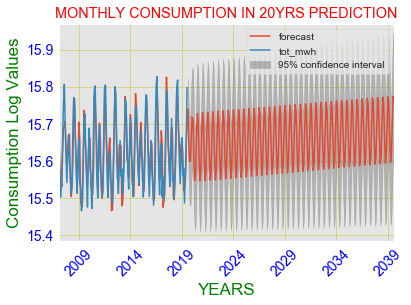

In [87]:
#We have 151 data + 12mnt*20yrs(existing data of 12 month time series interval 20 years) data points.  
results_mwh_ARIMA.plot_predict(1,391) 
plt.ylabel('Consumption Log Values', fontsize=17,color= 'green')
plt.xlabel('YEARS', fontsize=17,color= 'green')
plt.xticks(fontsize=14, rotation=45, color= 'brown')
plt.yticks(fontsize=14, color= 'brown')
plt.legend(loc='best')
plt.title('MONTHLY CONSUMPTION IN 20YRS PREDICTION', color= 'red')
plt.tick_params(length=2, width=2, colors='b',
grid_color='y', grid_alpha=.5)



In [88]:
#Prediction not converted with date
results_mwh_ARIMA.predict(1,391).tail()

2039-04-01   -0.073530
2039-05-01    0.015377
2039-06-01    0.089130
2039-07-01    0.074039
2039-08-01   -0.014815
Freq: MS, dtype: float64

In [89]:
#Monthly Consumption in mwh Value Prediction till 2039
consumption = results_mwh_ARIMA.forecast(steps=391) 
print('NUMBER OF MONTHS:',len(consumption[0]))
print('\nPER MONTH PREDICTED CONSUMPTION:\n', np.round(np.exp(consumption[0]), 2))

NUMBER OF MONTHS: 391

PER MONTH PREDICTED CONSUMPTION:
 [6848550.31 6246886.75 5948190.37 5962774.38 6421574.   6698756.42
 6646051.48 5985404.23 5649056.48 5760135.31 6347376.55 6767126.44
 6613650.19 6021743.77 5638643.97 5779473.28 6343539.45 6782967.91
 6617994.83 6034522.52 5643981.61 5787412.21 6348612.51 6792071.63
 6627020.06 6044298.33 5651338.25 5793903.53 6354825.93 6800318.8
 6636651.38 6053704.1  5658965.35 5800219.1  6361189.53 6808460.56
 6646368.98 6063076.08 5666639.83 5806521.28 6367577.01 6816592.78
 6656106.49 6072457.23 5674333.25 5812830.81 6373972.27 6824727.7
 6665855.45 6081853.04 5682041.99 5819150.37 6380373.27 6832866.87
 6675614.76 6091264.21 5689765.63 5825480.31 6386779.76 6841010.48
 6685384.29 6100690.86 5697504.13 5831820.71 6393191.74 6849158.58
 6695164.   6110132.99 5705257.5  5838171.61 6399609.22 6857311.14
 6704953.89 6119590.63 5713025.78 5844533.02 6406032.2  6865468.19
 6714753.95 6129063.8  5720808.99 5850904.98 6412460.72 6873629.71
 672456

#### In the graph shown, it shows a little increase in prediction for the next 20 years , for example the monthly predicted Consumption for  the date 2039-08-01 is 652,6993.55 MWH for the whole US(Total of all State) for the date Aug. 1, 2039.

### 20 years prediction for NUMBER OF CUSTOMERS in count 

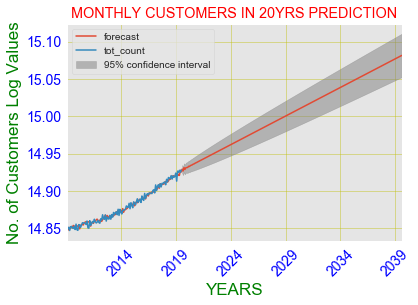

In [90]:
#We have 151 data + 12mnt*20yrs(existing data of 12 month time series interval 20 years) data points. 
results_count_ARIMA.plot_predict(1,367) 
plt.ylabel('No. of Customers Log Values', fontsize=17,color= 'green')
plt.xlabel('YEARS', fontsize=17,color= 'green')
plt.xticks(fontsize=14, rotation=45, color= 'brown')
plt.yticks(fontsize=14, color= 'brown')
plt.legend(loc='best')
plt.title('MONTHLY CUSTOMERS IN 20YRS PREDICTION', color= 'red')
plt.tick_params(length=2, width=2, colors='b',
grid_color='y', grid_alpha=.5)


In [91]:
#Prediction not converted with date
results_count_ARIMA.predict(1,367).tail()

2039-04-01    0.00064
2039-05-01    0.00064
2039-06-01    0.00064
2039-07-01    0.00064
2039-08-01    0.00064
Freq: MS, dtype: float64

In [92]:
#Monthly Consumption in mwh Value Prediction till 2039
count = results_count_ARIMA.forecast(steps=367) 
print('NUMBER OF MONTHS:',len(count[0]))
print('\nPER MONTH PREDICTED NUMBER OF CUSTOMERS:\n', np.round(np.exp(count[0]), 2))

NUMBER OF MONTHS: 367

PER MONTH PREDICTED NUMBER OF CUSTOMERS:
 [3045619.07 3037909.43 3051541.93 3044113.92 3051173.81 3052170.23
 3052246.09 3057236.32 3056368.08 3060158.32 3061442.59 3063159.72
 3065846.34 3067004.69 3069572.06 3071235.08 3073222.9  3075342.49
 3077094.98 3079250.51 3081107.18 3083111.91 3085109.41 3087029.56
 3089058.93 3090996.47 3092990.99 3094970.84 3096938.74 3098934.92
 3100905.12 3102895.7  3104879.22 3106863.22 3108854.62 3110839.76
 3112832.27 3114822.68 3116815.05 3118809.86 3120804.   3122801.24
 3124798.57 3126797.62 3128798.09 3130799.39 3132802.47 3134806.45
 3136811.91 3138818.63 3140826.54 3142835.87 3144846.36 3146858.22
 3148871.34 3150885.73 3152901.44 3154918.41 3156936.7  3158956.26
 3160977.12 3162999.27 3165022.71 3167047.45 3169073.49 3171100.82
 3173129.45 3175159.37 3177190.6  3179223.12 3181256.94 3183292.07
 3185328.49 3187366.22 3189405.25 3191445.59 3193487.23 3195530.18
 3197574.44 3199620.   3201666.87 3203715.05 3205764.55 3207815.

#### In the graph shown, it shows a steady increase in prediction for the next 20 years , for example the monthly predicted Number of customers for  the date 2039-08-01 is 3844232.49 for the whole US(Total of all State) for the date Aug. 1, 2039.

### 20 years prediction for COST in kwh

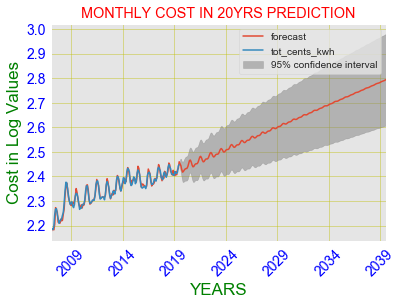

In [93]:
#We have 151 data + 12mnt*20yrs(existing data of 12 month time series interval 20 years) data points. 
results_cost_ARIMA.plot_predict(1,391) 
plt.ylabel('Cost in Log Values', fontsize=17,color= 'green')
plt.xlabel('YEARS', fontsize=17,color= 'green')
plt.xticks(fontsize=14, rotation=45, color= 'brown')
plt.yticks(fontsize=14, color= 'brown')
plt.legend(loc='best')
plt.title('MONTHLY COST IN 20YRS PREDICTION', color= 'red')
plt.tick_params(length=2, width=2, colors='b',
grid_color='y', grid_alpha=.5)



In [94]:
#Prediction not converted with date
results_cost_ARIMA.predict(1,391).tail(10)

2038-11-01    0.000884
2038-12-01    0.001217
2039-01-01    0.001922
2039-02-01    0.001953
2039-03-01    0.001731
2039-04-01    0.001158
2039-05-01    0.001230
2039-06-01    0.001505
2039-07-01    0.002080
2039-08-01    0.001974
Freq: MS, dtype: float64

In [95]:
#Monthly Consumption in mwh Value Prediction till 2039
cost = results_cost_ARIMA.forecast(steps=391) 
print('NUMBER OF MONTHS:',len(cost[0]))
print('\nPER MONTH PREDICTED COST:\n',np.round(np.exp(cost[0]), 2))

NUMBER OF MONTHS: 391

PER MONTH PREDICTED COST:
 [11.61 11.52 11.33 11.22 11.26 11.32 11.36 11.38 11.39 11.47 11.62 11.76
 11.78 11.69 11.55 11.46 11.48 11.55 11.6  11.61 11.61 11.68 11.81 11.93
 11.96 11.89 11.77 11.7  11.71 11.78 11.83 11.84 11.84 11.89 12.   12.12
 12.15 12.09 11.99 11.93 11.95 12.01 12.06 12.07 12.07 12.11 12.21 12.31
 12.35 12.3  12.22 12.17 12.19 12.24 12.29 12.3  12.3  12.34 12.42 12.51
 12.55 12.52 12.45 12.41 12.42 12.48 12.52 12.54 12.54 12.57 12.64 12.72
 12.76 12.74 12.68 12.65 12.67 12.72 12.76 12.78 12.77 12.8  12.86 12.94
 12.98 12.97 12.92 12.89 12.91 12.96 13.   13.02 13.02 13.04 13.09 13.16
 13.2  13.2  13.16 13.14 13.16 13.2  13.24 13.26 13.26 13.28 13.33 13.39
 13.43 13.43 13.41 13.39 13.41 13.45 13.49 13.51 13.51 13.53 13.57 13.63
 13.67 13.68 13.65 13.64 13.66 13.7  13.74 13.76 13.76 13.78 13.82 13.87
 13.91 13.92 13.91 13.9  13.92 13.96 13.99 14.01 14.02 14.04 14.07 14.12
 14.16 14.17 14.16 14.16 14.18 14.22 14.25 14.27 14.28 14.3  14.33 14.38
 

#### In the graph shown, it shows a steady increase in cost prediction for the next 20 years , for example the monthly predicted Number of customers for  the date 2039-08-01 is 20.56 cent per kwh the average cost for whole US(Averatge cost per State) for the date Aug. 1, 2039.

## Conclusion:<a name="Conclusion"></a>

* We were able to make a model that learn from the past data and predict the monthly values for the next 20 years for Revenue, Demand/Consumption in MWH, Number of Customers and Cost in KWH with a small range of 95% confidence intervals. 
* All except Consumption in MWH increase with time while the consumption is a  little increase for the demand for the next 20 years. 
* Knowing the trend, seasonality & values for the next 20 yrs will help us to make decisions and plan in advance to meet the Electrical power supply and demand while in accordance with the policies of government and meet long-term climate goals under the Paris Agreement. 

### Before Implementing:
* Review with group of the engineering department for further study before deployment.
* Our inputs can be the dates intervals, monthly interval for monthly prediction, weekly intervals for weekly prediction and so on.
* We can also base in this model to be able to  predict Revenue, Consumption in MWH, Number of Customers and Cost in KWH per State and per sector(Residential, Commercial, Industrial) basis.

### How can we maintain our models after implementing:
* Monitor - constant monitoring of the model is needed to determine the performance accuracy of the model.
* Evaluate - evaluating the metrics of the current model is calculated to determine if new algorithm is needed.
* Compare - the new model is compared against each other to determine which model perform the best.
* Rebuild - The best performing model is rebuilt on current state the data.



